### Project Title: Reliable Air Travel; Stratified Analysis of Flight Delay
 
#### Overview

This project, “Reliable Air Travel; Stratified Analysis of Flight Delay,” aims to explore how reliability interacts within the air travel industry. The study will look at the main factors that influence delays in domestic flights within the United States and how these vary between different routes. It will also test how well machine learning models can predict flight delays using operational data, and how these predictions may differ across routes and airlines.
 
#### Research Questions

**RQ1:** What are the key factors influencing departure and arrival delays in domestic U.S.

flights, and how do these vary by airline and airport?
 
**RQ2:** To what extent do machine learning models predict flight arrival delays based on

operational and environmental features, and how do these predictions differ across

airlines and routes?
 
**RQ3:** What is the effect of imbalanced data on model bias toward the majority class in flight delay prediction, and how do resampling or class-weighting techniques improve minority-class recall?
 

#### 1. Initial Steps
- Import Libraries
- Read the CSV file
- Find missing and null values
- Remove Duplicate values
- Summary Statistics
- Format date columns

In [8]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

df = pd.read_csv('USA flights delay data.csv')
df


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:"              , df.duplicated().sum())
df.isna().sum()

Shape of dataset: (5819079, 31)

Missing values:
 YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY       

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [14]:
df.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [16]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [18]:
# format the time columns to HH:MM  
def Convert_to_HHMM(time):
    if time == "24:00":
        return "00:00"
    elif pd.isna(time):
        return None
    time=int(time)
    hours = time // 100
    minutes = time % 100
    return f"{hours:02d}:{minutes:02d}"
df["SCHEDULED_DEPARTURE_HHMM"] = df["SCHEDULED_DEPARTURE"].apply(Convert_to_HHMM)
df["DEPARTURE_TIME_HHMM"] = df["DEPARTURE_TIME"].apply(Convert_to_HHMM)
df["SCHEDULED_ARRIVAL_HHMM"] = df["SCHEDULED_ARRIVAL"].apply(Convert_to_HHMM)
df["ARRIVAL_TIME_HHMM"] = df["ARRIVAL_TIME"].apply(Convert_to_HHMM)

In [20]:
# Create a date column by joining day, month, year
df['DATE'] = pd.to_datetime(df[['DAY','MONTH','YEAR']])

In [22]:
# Rearrange the columns
df = df[['YEAR', 'MONTH','DAY','DATE','DAY_OF_WEEK','FLIGHT_NUMBER','AIRLINE','ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE_HHMM','DEPARTURE_TIME_HHMM',
       'DEPARTURE_DELAY','TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME','SCHEDULED_ARRIVAL_HHMM','ARRIVAL_TIME_HHMM',
        'AIR_TIME', 'DISTANCE','WHEELS_ON',
       'TAXI_IN', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY',
       ]]

In [24]:
# Check the distribution of the Cancellation reason  
df['CANCELLATION_REASON'].value_counts()

CANCELLATION_REASON
B    48851
A    25262
C    15749
D       22
Name: count, dtype: int64

#### 2. Exploratory Data Analysis
- Flight statistics
- Airline statistics
- Route statistics
- Correlation matrix heatmap
- Boxplots to compare numeric features across flight delay

In [26]:
# Basic flight statistics

total_flights = len(df)

cancelled_flights = df['CANCELLED'].sum()

diverted_flights = df['DIVERTED'].sum()

on_time_flights = len(df[(df['DEPARTURE_DELAY'] <= 0) & (df['CANCELLED'] == 0)])



print("Flight Statistics:")

print (f"Total flights: {total_flights:,}")

print (f"Cancelled Flights: {cancelled_flights:,} ({(cancelled_flights/total_flights)*100:.2f})%")

print (f"Diverted Flights: {diverted_flights:,} ({(diverted_flights/total_flights)*100:.2f})%")

print (f"Ontime Flights: {on_time_flights:,} ({(on_time_flights/total_flights)*100:.2f})%")


                                                                                                                                                                                           

Flight Statistics:
Total flights: 5,819,079
Cancelled Flights: 89,884 (1.54)%
Diverted Flights: 15,187 (0.26)%
Ontime Flights: 3,606,117 (61.97)%


In [28]:
# Summary of Airline Statistics
airline_stats = df.groupby('AIRLINE').agg({'FLIGHT_NUMBER':'count','DEPARTURE_DELAY':'mean',
                                          'ARRIVAL_DELAY':'mean','CANCELLED':'sum',
                                          'DIVERTED':'sum'}).round(2)
airline_stats.columns = ['Total_Flights','Avg_Departure_Delay','Avg_Arrival_Delay',
                         'Cancelled_Flights','Diverted_Flights']
airline_stats = airline_stats.sort_values('Total_Flights',ascending=False)
airline_stats

,Total_Flights,Avg_Departure_Delay,Avg_Arrival_Delay,Cancelled_Flights,Diverted_Flights
AIRLINE,,,,,
WN,1261855,10.58,4.37,16043,3409
DL,875881,7.37,0.19,3824,1782
AA,725984,8.90,3.45,10919,2130
OO,588353,7.80,5.85,9960,1579
EV,571977,8.72,6.59,15231,1994
UA,515723,14.44,5.43,6573,1388
MQ,294632,10.13,6.46,15025,816
B6,267048,11.51,6.68,4276,730
US,198715,6.14,3.71,4067,425


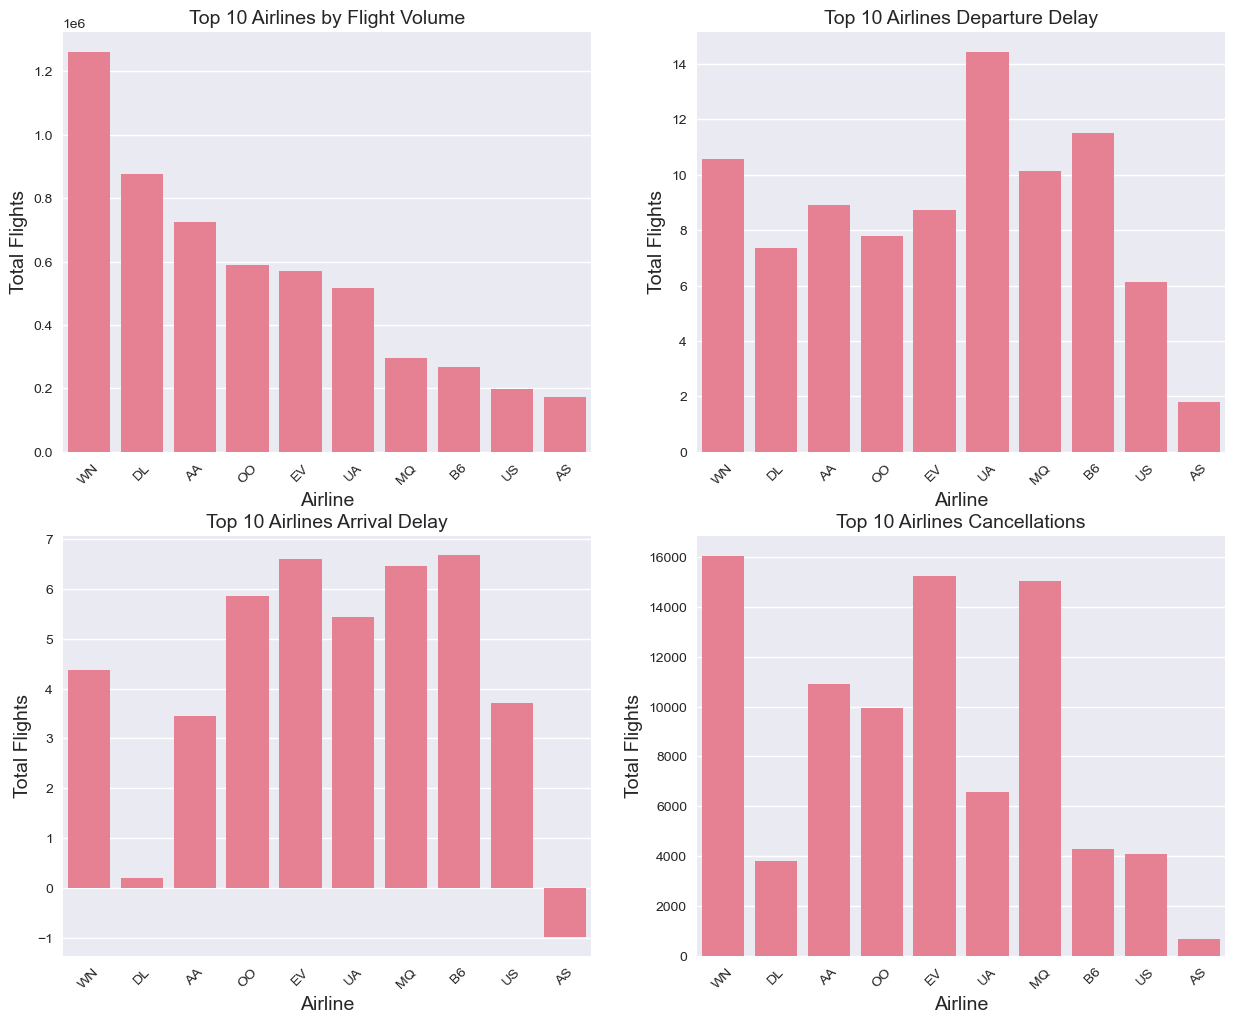

In [30]:
# Airline Stats Visualisation

fig, axes = plt.subplots(2,2, figsize=(15,12))
 
#Flight Volumns

top_airlines = airline_stats.head(10)

sns.barplot(data=top_airlines.reset_index(),x='AIRLINE',y='Total_Flights',ax = axes[0,0])

axes[0, 0].set_xlabel('Airline', fontsize=14)

axes[0, 0].set_ylabel('Total Flights', fontsize=14)

axes[0,0].set_title('Top 10 Airlines by Flight Volume', fontsize = 14)

axes[0,0].tick_params(axis='x',rotation=45)
 
# Average Departure Delay by Airlines

top_airlines = airline_stats.head(10)

sns.barplot(data=top_airlines.reset_index(),x='AIRLINE',y='Avg_Departure_Delay',ax = axes[0,1])

axes[0, 1].set_xlabel('Airline', fontsize=14)

axes[0, 1].set_ylabel('Total Flights', fontsize=14)

axes[0,1].set_title('Top 10 Airlines Departure Delay', fontsize = 14)

axes[0,1].tick_params(axis='x',rotation=45)
 
# Average Arrival Delay by Airlines

top_airlines = airline_stats.head(10)

sns.barplot(data=top_airlines.reset_index(),x='AIRLINE',y='Avg_Arrival_Delay',ax = axes[1,0])

axes[1, 0].set_xlabel('Airline', fontsize=14)

axes[1, 0].set_ylabel('Total Flights', fontsize=14)

axes[1,0].set_title('Top 10 Airlines Arrival Delay', fontsize = 14)

axes[1,0].tick_params(axis='x',rotation=45)
 
# Average Cancellation by Airlines

top_airlines = airline_stats.head(10)

sns.barplot(data=top_airlines.reset_index(),x='AIRLINE',y='Cancelled_Flights',ax = axes[1,1])

axes[1, 1].set_xlabel('Airline', fontsize=14)

axes[1, 1].set_ylabel('Total Flights', fontsize=14)

axes[1,1].set_title('Top 10 Airlines Cancellations', fontsize = 14)

axes[1,1].tick_params(axis='x',rotation=45)
 
plt.show()
 

#### Airline Statistics
- Top 3 airlines by flight volume - Southwest Airlines, Delta Airlines and American Airlines
- Top 3 airlines by departure delay - United Airlines, Southwest Airlines and JetBlue Airways
- Airlines with least departure and arrival delay - Alaska Airlines


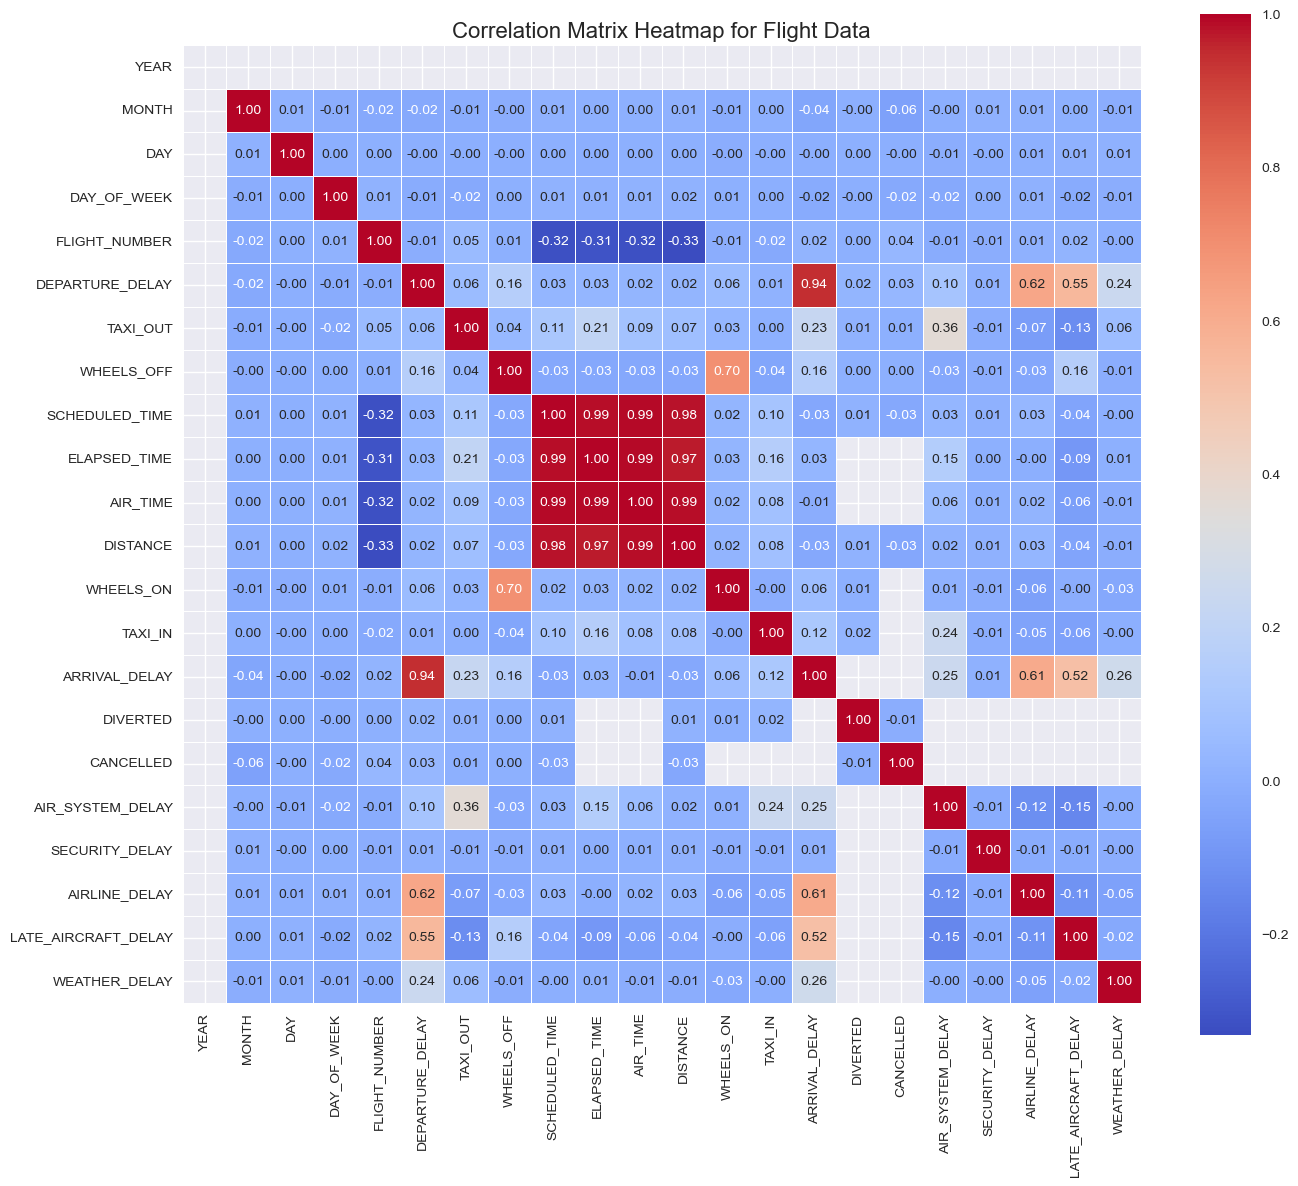

In [32]:
# Create correlation heatmap

# Drop non-numeric columns
non_numeric_cols = [
    'DATE', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'CANCELLATION_REASON'
]
numeric_df = df.drop(columns=non_numeric_cols, errors='ignore')
numeric_df = numeric_df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap for Flight Data', fontsize=16)
plt.tight_layout()
plt.show()

#### Correlation matrix
The correlation matrix shows limited multicollinearity across most variables, with stronger correlations observed between departure delay, wheels-on time, and operational delay causes such as airline and late aircraft delays. This supports their relevance in the analysis and indicates that correlated features do not adversely affect the chosen tree-based models

In [34]:
# Summary Departure and Arrival delays by month
monthly_delay = df.groupby('MONTH',as_index=False).agg({'DEPARTURE_DELAY':'mean',
                                          'ARRIVAL_DELAY':'mean'}).round(2)
monthly_delay['Month_Name'] = monthly_delay['MONTH'].map({1:'Jan',2:'Feb',
                                        3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',
                                            10:'Oct',11:'Nov',12:'Dec'})
monthly_delay

,MONTH,DEPARTURE_DELAY,ARRIVAL_DELAY,Month_Name
0,1,9.76,5.81,Jan
1,2,11.89,8.32,Feb
2,3,9.66,4.92,Mar
3,4,7.72,3.16,Apr
4,5,9.45,4.49,May
5,6,13.99,9.60,Jun
6,7,11.39,6.43,Jul
7,8,9.93,4.61,Aug
8,9,4.82,-0.77,Sep
9,10,4.98,-0.78,Oct


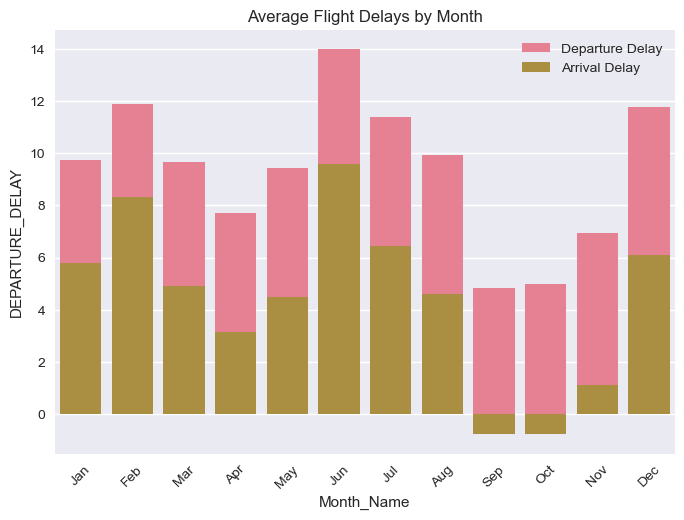

In [36]:
# Departure and Arrival Trends by monthplt.figure(figsize=(10,6))
sns.barplot(data=monthly_delay, x='Month_Name', y='DEPARTURE_DELAY', label='Departure Delay')
sns.barplot(data=monthly_delay, x='Month_Name', y='ARRIVAL_DELAY', label='Arrival Delay')
plt.title('Average Flight Delays by Month')
plt.xticks(rotation=45)
plt.legend()
plt.show()                                                      

#### Time Statistics 
Summer months of June and July have maximum flight delays and fall months September and October have least flight delays
 


 Top 15 Routes: 
  Route  No of Flights
SFOLAX          13744
LAXSFO          13457
JFKLAX          12016
LAXJFK          12015
LASLAX           9715
LGAORD           9639
LAXLAS           9594
ORDLGA           9575
SFOJFK           8440
JFKSFO           8437
OGGHNL           8313
HNLOGG           8282
LAXORD           8256
ATLLGA           8234
LGAATL           8215


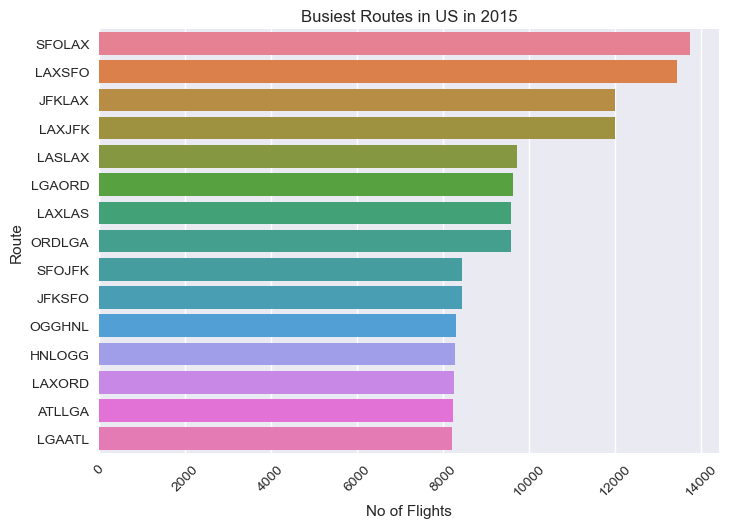

,Total_Flights,Avg_Departure_Delay,Avg_Arrival_Delay,Cancelled_Flights,Diverted_Flights
ROUTE,,,,,
SFOLAX,13744,12.60,11.44,338,6
LAXSFO,13457,14.06,10.74,342,6
JFKLAX,12016,7.97,-2.67,141,22
LAXJFK,12015,10.72,0.61,143,21
LASLAX,9715,11.33,11.97,63,1
LGAORD,9639,12.27,3.77,435,25
LAXLAS,9594,11.18,8.66,66,6
ORDLGA,9575,16.12,10.29,408,66
SFOJFK,8440,12.62,2.14,116,18


In [38]:
import warnings

warnings.filterwarnings("ignore")

 # Busiest airports

df['ROUTE'] = df['ORIGIN_AIRPORT'] + df['DESTINATION_AIRPORT']

top_routes = df['ROUTE'].value_counts().head(15)

top_routes = top_routes.reset_index()

top_routes.columns = ['Route','No of Flights']

print(f"\n Top 15 Routes: \n {top_routes.to_string(index=False)}")
 
# Visualisation

sns.barplot(data=top_routes, x='No of Flights', y='Route',hue='Route')

plt.title("Busiest Routes in US in 2015")

plt.xticks(rotation=45)

plt.show()
 
# Summary of Route Statistics

route_stats = df.groupby('ROUTE').agg({'FLIGHT_NUMBER':'count','DEPARTURE_DELAY':'mean',

                                          'ARRIVAL_DELAY':'mean','CANCELLED':'sum',

                                          'DIVERTED':'sum'}).round(2)

route_stats.columns = ['Total_Flights','Avg_Departure_Delay','Avg_Arrival_Delay',

                         'Cancelled_Flights','Diverted_Flights']

route_stats = route_stats.sort_values('Total_Flights',ascending=False)

top_route_stats = route_stats.head(15)

top_route_stats
 

#### Route Statistics

- Top 3 busiest routes – San Francisco-Los Angeles, Los Angeles-San Francisco, NYC-Los Angeles


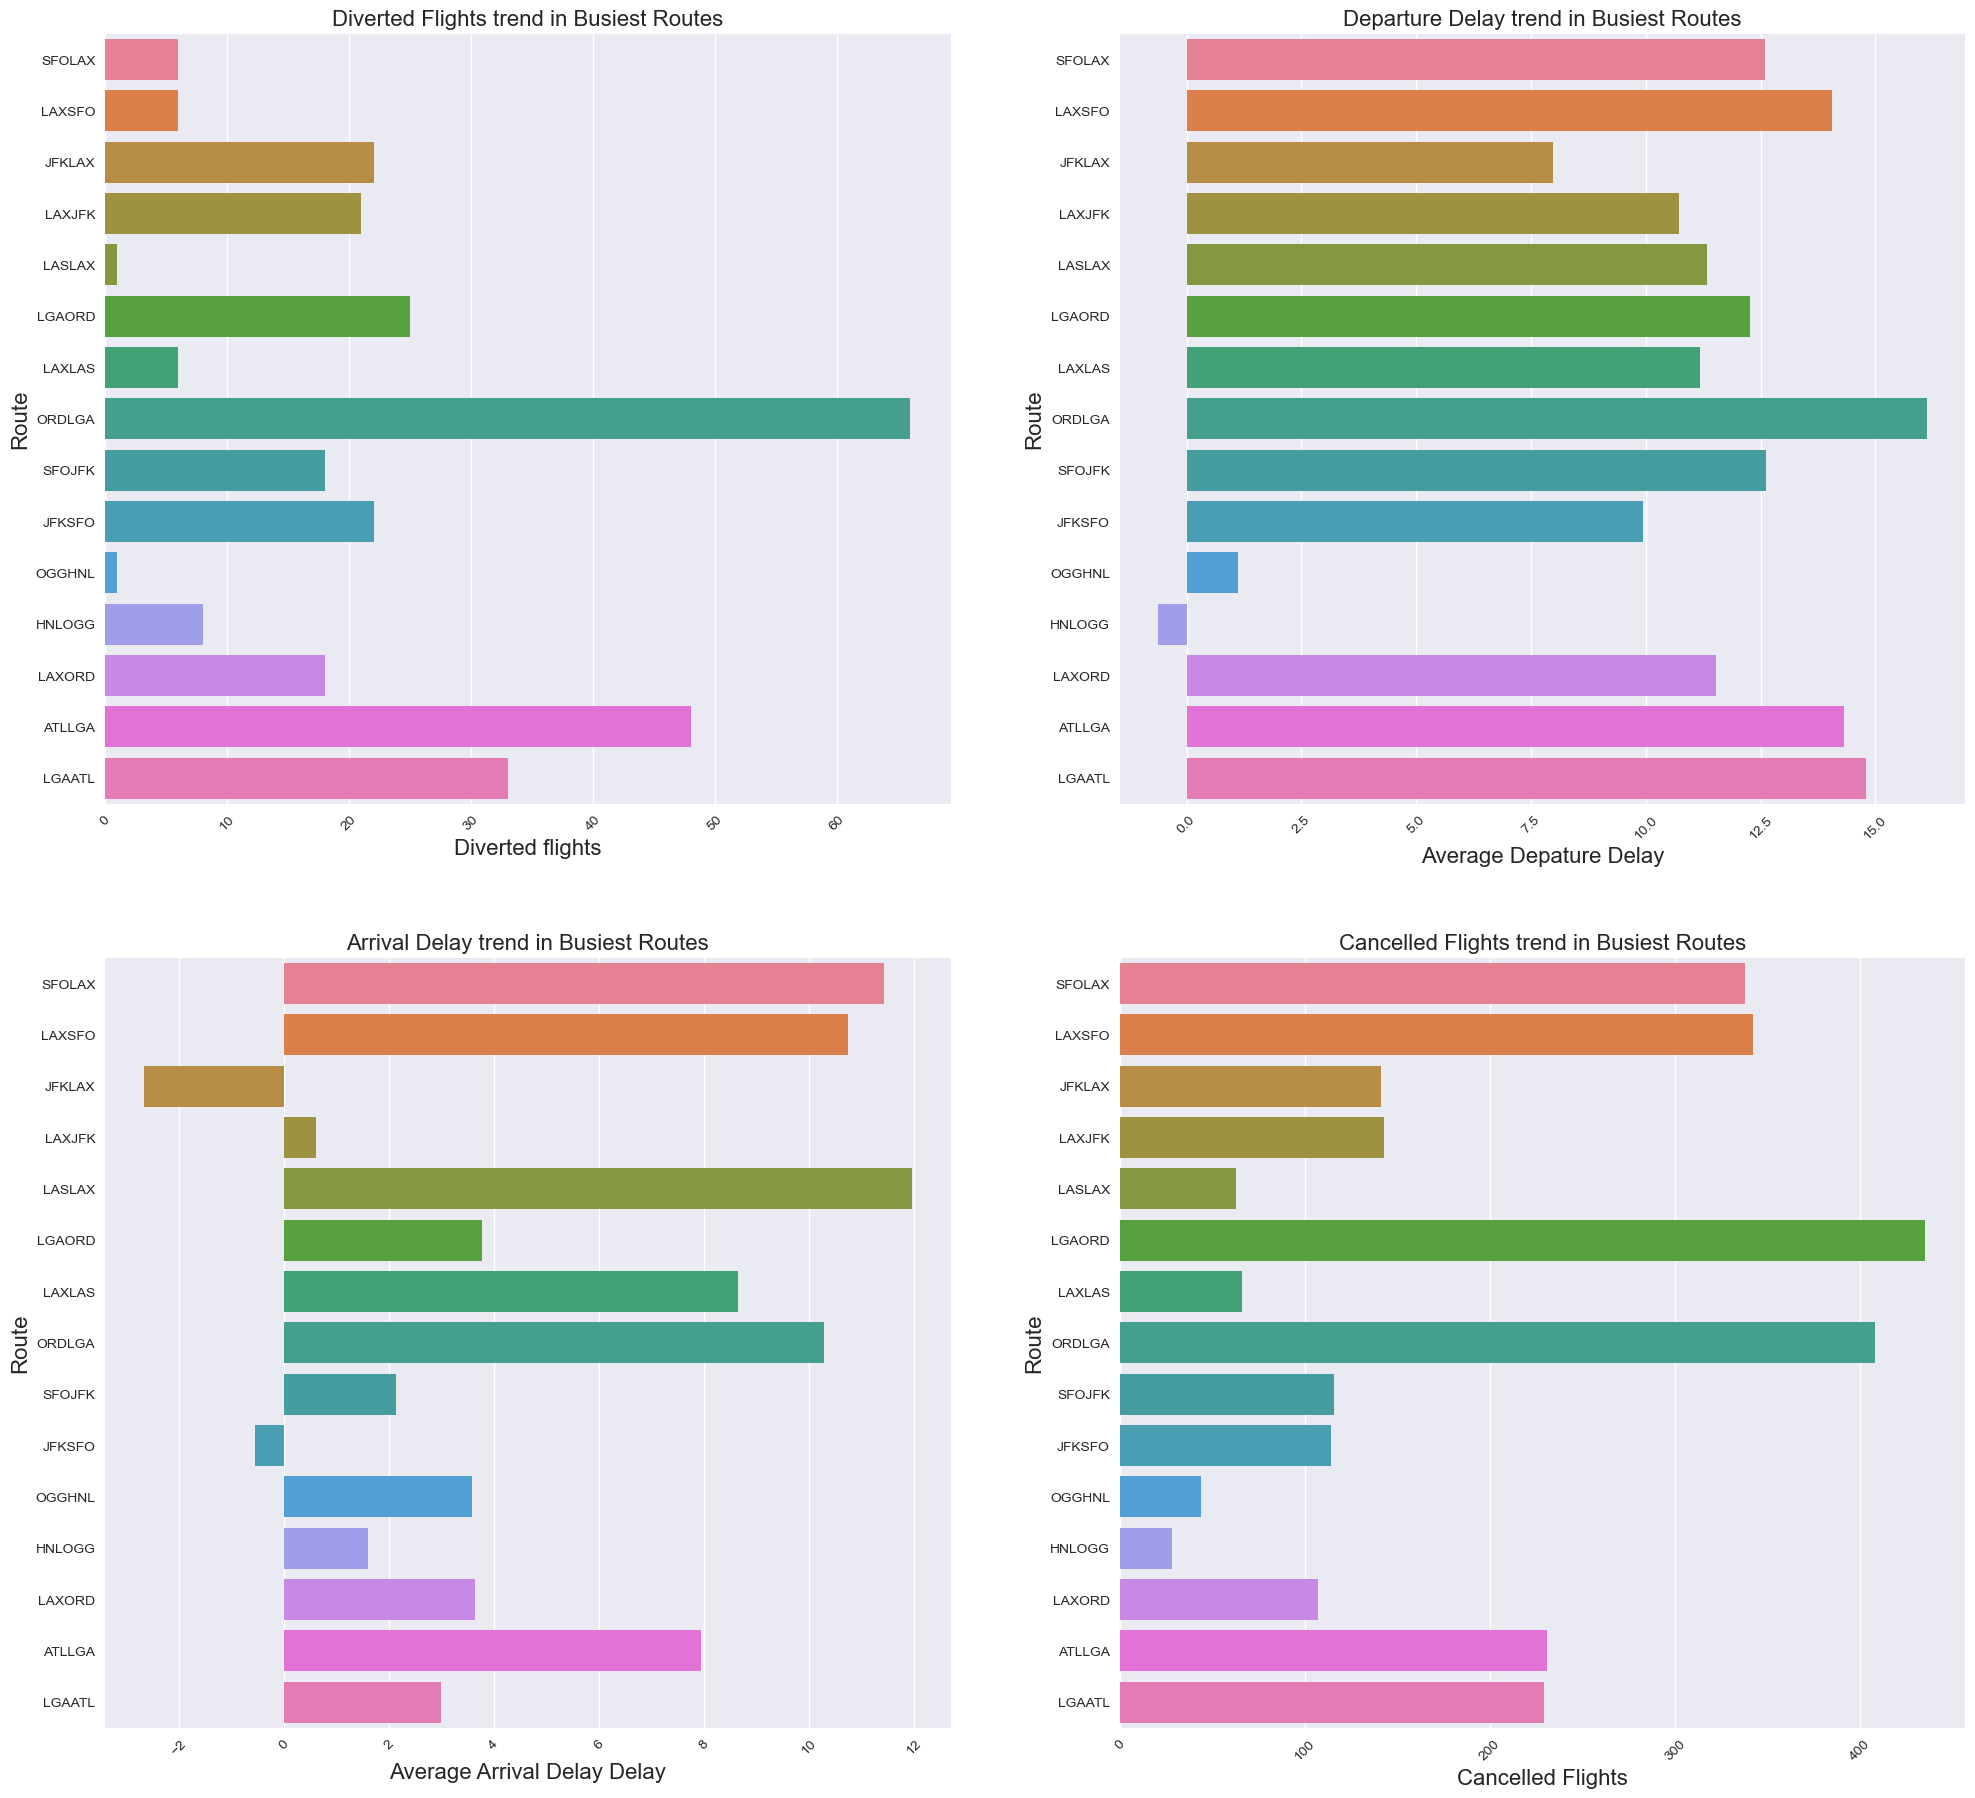

In [40]:
# Route Stats Visualisation
fig, axes = plt.subplots(2,2, figsize=(24,22))
 
# Diverted Flights
sns.barplot(data=top_route_stats ,y='ROUTE',x='Diverted_Flights', hue='ROUTE',ax = axes[0,0])
axes[0,0].set_title('Diverted Flights trend in Busiest Routes', fontsize=16)
axes[0, 0].set_ylabel('Route', fontsize=16)
axes[0, 0].set_xlabel('Diverted flights', fontsize=16)
axes[0,0].tick_params(axis='x',rotation=45)
 
# Average Departure Delay by Route
sns.barplot(data=top_route_stats,y='ROUTE',x='Avg_Departure_Delay',hue='ROUTE',ax = axes[0,1])
axes[0,1].set_title('Departure Delay trend in Busiest Routes', fontsize=16)
axes[0, 1].set_ylabel('Route', fontsize=16)
axes[0, 1].set_xlabel('Average Depature Delay', fontsize=16)
axes[0,1].tick_params(axis='x',rotation=45)
 
# Average Arrival Delay by Route
sns.barplot(data=top_route_stats,y='ROUTE',x='Avg_Arrival_Delay',hue='ROUTE',ax = axes[1,0])
axes[1,0].set_title('Arrival Delay trend in Busiest Routes', fontsize=16)
axes[1, 0].set_ylabel('Route', fontsize=16)
axes[1, 0].set_xlabel('Average Arrival Delay Delay', fontsize=16)
axes[1,0].tick_params(axis='x',rotation=45)
 
# Average Cancellation by Route
sns.barplot(data=top_route_stats,y='ROUTE',x='Cancelled_Flights',hue='ROUTE',ax = axes[1,1])
axes[1, 1].set_ylabel('Route', fontsize=16)
axes[1, 1].set_xlabel('Cancelled Flights', fontsize=16)
axes[1,1].set_title('Cancelled Flights trend in Busiest Routes', fontsize=16)
axes[1,1].tick_params(axis='x',rotation=45)
 
plt.show()
 

#### Route Statistics
- Routes with maximum departure delay - Chicago-La Guardia NYC and La Guardia NYC-Atlanta
- Routes with least departure delay - Maui-Honolulu, Hawaii

In [42]:
import warnings
warnings.filterwarnings("ignore")

# Target variable creation 
df['DEPARTURE_DELAYED'] = (df['DEPARTURE_DELAY'] >= 15).astype(int)
df['ARRIVAL_DELAYED'] = (df['ARRIVAL_DELAY'] >= 15).astype(int)

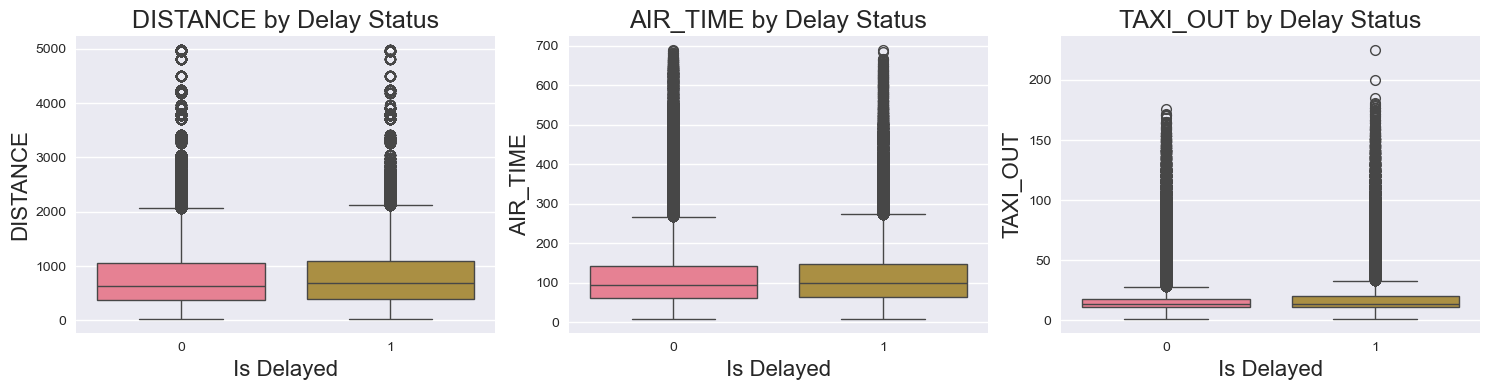

In [44]:
# Compare key numeric features across delayed and non-delayed flights
numeric_cols = ['DISTANCE', 'AIR_TIME', 'TAXI_OUT']
plt.figure(figsize=(15, 4))
 
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='DEPARTURE_DELAYED', y=col, data=df, hue='DEPARTURE_DELAYED',legend=False)
    plt.title(f'{col} by Delay Status',fontsize=18)
    plt.xlabel('Is Delayed', fontsize=16)
    plt.ylabel(col, fontsize=16)
 
plt.tight_layout()
plt.show()

The above box plots show that delayed flights tend to have slightly longer taxi-out times. We will scale the outliers and assess thier importance using RFE during model training

#### 3. Steps in feature engineering:
- Add delayed columns 1,0 based on 15 mins conditions
- clip large delays
#### 3.1 Create features:
- IS_Weekend/weekday
- season
- Distance(Short haul, medium haul, long haul)
- Airport(Large,medium,small,non hub)

In [46]:
df['DEPARTURE_DELAYED'].value_counts(normalize=True)

DEPARTURE_DELAYED
0    0.818261
1    0.181739
Name: proportion, dtype: float64

In [48]:
df['ARRIVAL_DELAYED'].value_counts(normalize=True)

ARRIVAL_DELAYED
0    0.81725
1    0.18275
Name: proportion, dtype: float64

In [50]:
import warnings
warnings.filterwarnings("ignore")

# Outlier Treatment - Clip delay large values (-12 or +24 hr) delays
df['ARRIVAL_DELAY'] = df['ARRIVAL_DELAY'].clip(lower=-720,upper=1440)
df['DEPARTURE_DELAY'] = df['DEPARTURE_DELAY'].clip(lower=-720,upper=1440)


In [54]:
# Convert to datetime and extract hour
df['SCHEDULED_HOUR'] = pd.to_datetime(df['SCHEDULED_DEPARTURE_HHMM'], format='%H:%M', errors='coerce').dt.hour

# Create TIME_OF_DAY
def hour_to_time_of_day(hour):
    if pd.isna(hour):
        return 'Unknown'
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TIME_OF_DAY'] = df['SCHEDULED_HOUR'].apply(hour_to_time_of_day)

In [56]:
# Create feature for flight is on weekday or weekend
df['IS_WEEKEND'] = df['DAY_OF_WEEK'].isin([6,7]).astype(int)

In [58]:
# Create feature for the season of the flight
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Fall'
df['SEASON'] = df['MONTH'].apply(get_season)

In [60]:
# Create feature for route distance categories
def distance_category(distance):
    if distance < 500:
        return 'Short-haul'
    elif 500 <= distance <= 1500:
        return 'Medium-haul'
    else:
        return 'Long-Haul'
df['DISTANCE_CATEGORY'] = df['DISTANCE'].apply(distance_category)

In [62]:
airports = pd.read_csv('airports.csv')

In [64]:
airports.rename(columns={'IATA_CODE':'ORIGIN_AIRPORT'},inplace=True)

In [66]:
# Merge the aiports data to the flights dataset
df = df.merge(airports[['ORIGIN_AIRPORT','LATITUDE',
       'LONGITUDE', 'Airport Type']],on='ORIGIN_AIRPORT',how='left')

#### 4. Model Training (Baseline)
- Drop unecessary columns
- Apply RFE to identfy most important features
- train the model

In [68]:
# Drop unecessary columns for the model
cols_to_drop = [
    'FLIGHT_NUMBER','DATE','YEAR',
    'DEPARTURE_TIME_HHMM','DEPARTURE_DELAY',
    'WHEELS_OFF','ELAPSED_TIME','ARRIVAL_TIME_HHMM','SCHEDULED_TIME',
    'AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_DELAY',
    'DIVERTED','CANCELLED','CANCELLATION_REASON',
    'AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY',
    'ROUTE'
]
df_cleaned = df.drop(cols_to_drop,axis=1)
df_cleaned

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE_HHMM,TAXI_OUT,SCHEDULED_ARRIVAL_HHMM,DISTANCE,DEPARTURE_DELAYED,ARRIVAL_DELAYED,SCHEDULED_HOUR,TIME_OF_DAY,IS_WEEKEND,SEASON,DISTANCE_CATEGORY,LATITUDE,LONGITUDE,Airport Type
0,1,1,4,AS,ANC,SEA,00:05,21.0,04:30,1448,0,0,0,Night,0,Winter,Medium-haul,61.17432,-149.99619,Medium
1,1,1,4,AA,LAX,PBI,00:10,12.0,07:50,2330,0,0,0,Night,0,Winter,Long-Haul,33.94254,-118.40807,Large
2,1,1,4,US,SFO,CLT,00:20,16.0,08:06,2296,0,0,0,Night,0,Winter,Long-Haul,37.61900,-122.37484,Large
3,1,1,4,AA,LAX,MIA,00:20,15.0,08:05,2342,0,0,0,Night,0,Winter,Long-Haul,33.94254,-118.40807,Large
4,1,1,4,AS,SEA,ANC,00:25,11.0,03:20,1448,0,0,0,Night,0,Winter,Medium-haul,47.44898,-122.30931,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,12,31,4,B6,LAX,BOS,23:59,22.0,08:19,2611,0,0,23,Night,0,Winter,Long-Haul,33.94254,-118.40807,Large
5819075,12,31,4,B6,JFK,PSE,23:59,17.0,04:46,1617,0,0,23,Night,0,Winter,Long-Haul,40.63975,-73.77893,Large
5819076,12,31,4,B6,JFK,SJU,23:59,17.0,04:40,1598,0,0,23,Night,0,Winter,Long-Haul,40.63975,-73.77893,Large
5819077,12,31,4,B6,MCO,SJU,23:59,10.0,03:40,1189,0,0,23,Night,0,Winter,Medium-haul,28.42889,-81.31603,Large


In [70]:
# Encode categorcal columns
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['AIRLINE', 'ORIGIN_AIRPORT','TIME_OF_DAY',
       'DESTINATION_AIRPORT','SEASON', 'DISTANCE_CATEGORY',
       'Airport Type']

for col in categorical_columns:
    le = LabelEncoder()
    df_cleaned[col + '_ENCODED'] = le.fit_transform(df_cleaned[col].astype(str))

print("Encoded columns created:")
print([col for col in df_cleaned.columns if '_ENCODED' in col])

Encoded columns created:
['AIRLINE_ENCODED', 'ORIGIN_AIRPORT_ENCODED', 'TIME_OF_DAY_ENCODED', 'DESTINATION_AIRPORT_ENCODED', 'SEASON_ENCODED', 'DISTANCE_CATEGORY_ENCODED', 'Airport Type_ENCODED']


In [72]:
# Prepare features on a Sample Dataset for RFE for top 12 values

numerical_features = ['MONTH', 'DAY', 'DAY_OF_WEEK','TAXI_OUT','DISTANCE',
        'SCHEDULED_HOUR','IS_WEEKEND','LATITUDE', 'LONGITUDE']

categorical_features = ['AIRLINE_ENCODED', 'ORIGIN_AIRPORT_ENCODED', 'TIME_OF_DAY_ENCODED', 
        'DESTINATION_AIRPORT_ENCODED', 'SEASON_ENCODED', 'DISTANCE_CATEGORY_ENCODED', 
        'Airport Type_ENCODED']

all_features = numerical_features + categorical_features

X = df_cleaned[all_features].fillna(0)
y = df_cleaned['DEPARTURE_DELAYED']

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X_tiny = X.sample(n=50000, random_state=42)
y_tiny = y.loc[X_tiny.index]

rf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced',n_jobs=-1)
rfe = RFE(estimator = rf, n_features_to_select=12,step=1)
rfe.fit(X_tiny,y_tiny)

selected_features = [feature for feature, selected in zip(all_features, rfe.support_) if selected]

print(f"Selected {len(selected_features)} features:")
for i, feat in enumerate(selected_features, 1):
    print(f"{i}. {feat}")

X_final = X[selected_features]
print(f"\nFinal Shape: {X_final.shape}")
    

Selected 12 features:
1. MONTH
2. DAY
3. DAY_OF_WEEK
4. TAXI_OUT
5. DISTANCE
6. SCHEDULED_HOUR
7. LATITUDE
8. LONGITUDE
9. AIRLINE_ENCODED
10. ORIGIN_AIRPORT_ENCODED
11. TIME_OF_DAY_ENCODED
12. DESTINATION_AIRPORT_ENCODED

Final Shape: (5819079, 12)


In [74]:
# Spilt the data 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y,
                        test_size = 0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (4655263, 12)
Test set: (1163816, 12)


### Random Forest


In [150]:
# Train the first model (Random Forest)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_model = RandomForestClassifier(
    n_estimators=100,max_depth=15,
    min_samples_split = 100,
    min_samples_leaf = 50,
    class_weight = 'balanced',
    random_state=42, n_jobs=-1)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\n Random Forest Performance")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['on_time','Delayed']))



 Random Forest Performance
Accuracy: 0.641

Classification Report:
              precision    recall  f1-score   support

     on_time       0.90      0.63      0.74    952305
     Delayed       0.29      0.68      0.41    211511

    accuracy                           0.64   1163816
   macro avg       0.59      0.66      0.58   1163816
weighted avg       0.79      0.64      0.68   1163816



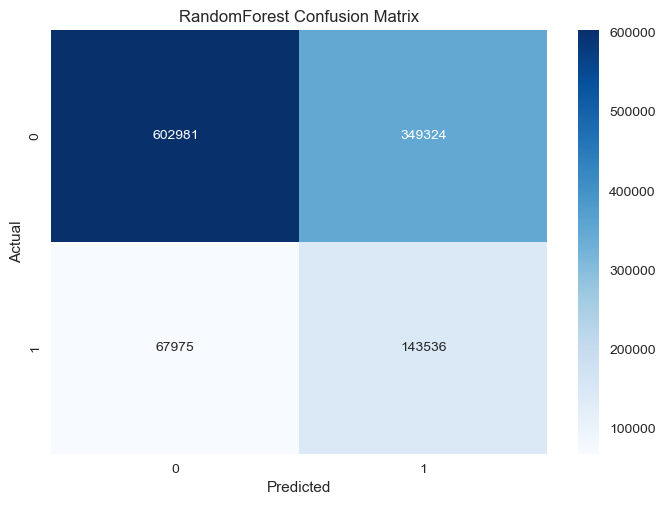

In [123]:
# Create a heatmap for confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("RandomForest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### LightGBM

Esemble Methods where each tree are correct.


[LightGBM] [Info] Number of positive: 846043, number of negative: 3809220
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.138044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1324
[LightGBM] [Info] Number of data points in the train set: 4655263, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181739 -> initscore=-1.504610
[LightGBM] [Info] Start training from score -1.504610

 LightGBM Performance
Accuracy: 0.8223035256432288

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90    952305
           1       0.65      0.05      0.09    211511

    accuracy                           0.82   1163816
   macro avg       0.74      0.52      0.50   1163816
weighted avg       0.79      0.82      0.75   1163816



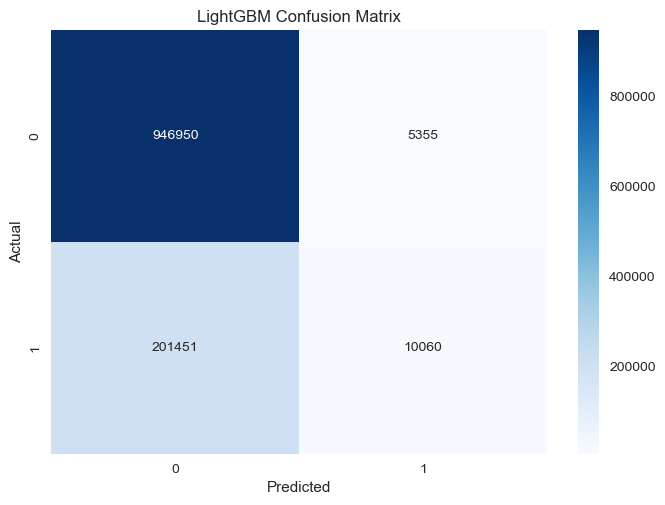

In [76]:
# Train the second model LightGBM classifier (lightgbm)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import lightgbm as lgb

lgbm_model = lgb.LGBMClassifier(random_state=42)

lgbm_model.fit(X_train, y_train)

y_pred_lgbm = lgbm_model.predict(X_test)

print("\n LightGBM Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))
cm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("LightGBM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


- **Baseline  model performance:** Random Forest achieved low (64%) accuracy, whereas LightGBM achieved relatively high accuracy (~82%). However, this performance is largely driven by the majority *on_time* class, limiting the reliability of accuracy as a sole evaluation metric.
 
- **Impact of class imbalance:** Precision and recall are substantially higher for *on_time* flights than for *delayed* flights.


 
**RQ3: What is the effect of imbalanced data on model bias toward the majority class in flight delay prediction, and how do resampling or class-weighting techniques improve minority-class recall?**

#### 4.1. Model optimization
- Apply Randomizedsearch CV for Hyperparameter Tuning on dataset sample and then train on full model

In [78]:
# Create a smaller tuning sample for faster processing due to large dataset
df_tune = df_cleaned.sample(200000, random_state=42)

X_small = df_tune[all_features]
y_small = df_tune['DEPARTURE_DELAYED']                                                                                                                          

In [80]:
# Apply RandomizedSearchCV on tuned dataset
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb

param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, -1],
    'num_leaves': [31, 50, 63],
    'learning_rate': [0.1, 0.05],
    'min_child_samples': [20, 50]
}

lgbm = lgb.LGBMClassifier(
    random_state=42,
    n_jobs=-1
)

rs = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=10,         # fast but still good
    scoring='accuracy',
    cv=2,              # reduces runtime
    verbose=2,
    n_jobs=-1
)

rs.fit(X_small, y_small)

print("Best Params:", rs.best_params_)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 36475, number of negative: 163525
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1344
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.182375 -> initscore=-1.500339
[LightGBM] [Info] Start training from score -1.500339
Best Params: {'num_leaves': 50, 'n_estimators': 150, 'min_child_samples': 20, 'max_depth': -1, 'learning_rate': 0.1}


In [82]:
# Retrain the model with the best params
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


best_params = rs.best_params_

lgbm_final = lgb.LGBMClassifier(
    **best_params,
    random_state=42,
    n_jobs=-1,
    subsample=0.8,
    colsample_bytree=0.8
)

lgbm_final.fit(X_train, y_train)

# predictions
y_pred = lgbm_final.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Final Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 846043, number of negative: 3809220
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.355386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 4655263, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181739 -> initscore=-1.504610
[LightGBM] [Info] Start training from score -1.504610
Final Accuracy: 0.8243742997174811
              precision    recall  f1-score   support

           0       0.83      0.99      0.90    952305
           1       0.66      0.07      0.13    211511

    accuracy                           0.82   1163816
   macro avg       0.74      0.53      0.51   1163816
weighted avg       0.80      0.82      0.76   1163

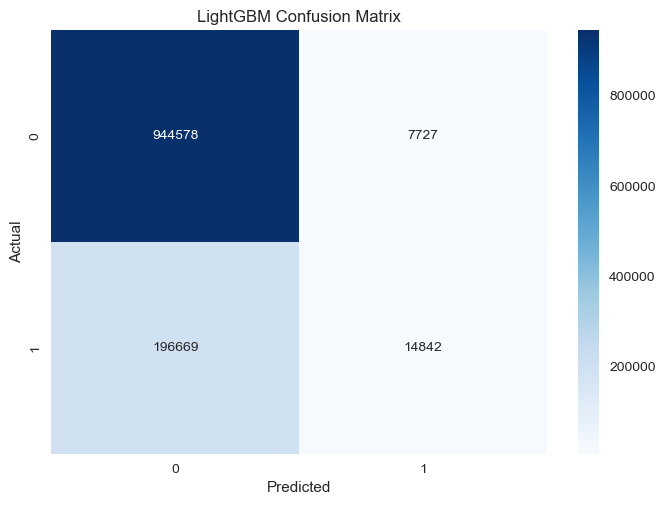

In [84]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("LightGBM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 846043, number of negative: 3809220
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.384362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1339
[LightGBM] [Info] Number of data points in the train set: 4655263, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.181739 -> initscore=-1.504610
[LightGBM] [Info] Start training from score -1.504610
Accuracy: 0.652527547309884

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.65      0.75    952305
           1       0.30      0.67      0.41    211511

    accuracy                           0.65   1163816
   macro avg       0.60      0.66      0.58   1163816
weighted avg       0.79      0.6

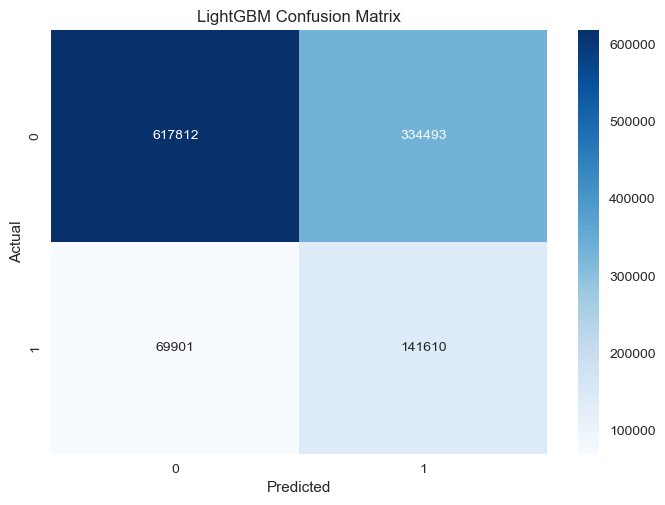

In [86]:
# Train the second model LightGBM classifier (lightgbm) with scale_pos_weight

import lightgbm as lgb

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 
lgbm_model = lgb.LGBMClassifier(random_state=42, scale_pos_weight=4.5024)
 
lgbm_model.fit(X_train, y_train)
 
y_pred_lgbm = lgbm_model.predict(X_test)
 
 
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))

print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))

cm = confusion_matrix(y_test, y_pred_lgbm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("LightGBM Confusion Matrix")

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.show()
 

Logistic Regression Performance

Accuracy: 0.5875121153171979

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.57      0.69    952305
           1       0.25      0.65      0.37    211511

    accuracy                           0.59   1163816
   macro avg       0.57      0.61      0.53   1163816
weighted avg       0.77      0.59      0.63   1163816



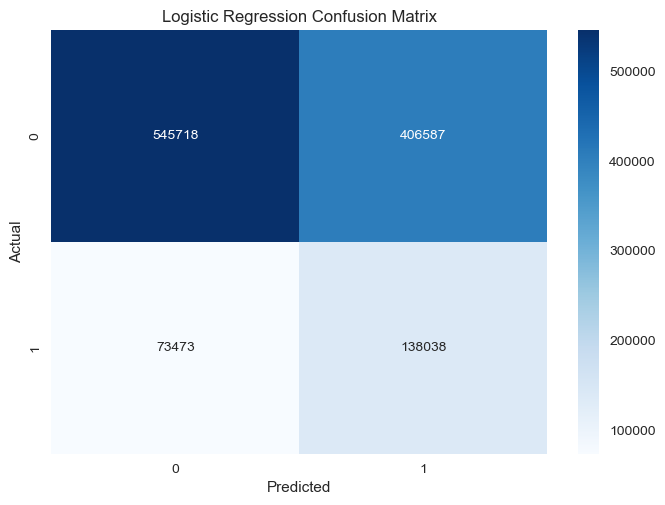

In [88]:
# Train the third model (Logistic Regression)

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
 
# Normalize features

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test)
 
lr_model = LogisticRegression(

    class_weight = 'balanced',

    max_iter = 1000,

    random_state = 42,

    n_jobs = -1

)
 
lr_model.fit(X_train_scaled,y_train)
 
y_pred_rs_lr = lr_model.predict(X_test_scaled)
 
# Evaluation metrics

print('Logistic Regression Performance')

print("\nAccuracy:", accuracy_score(y_test, y_pred_rs_lr))

print("\nClassification Report:\n", classification_report(y_test, y_pred_rs_lr))

cm = confusion_matrix(y_test, y_pred_rs_lr)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Logistic Regression Confusion Matrix")

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.show()
 

Best Params {'solver': 'saga', 'max_iter': 5000, 'C': 0.001}
Best F1 Score 0.36541014300210106
Test Accuracy: 0.5874579830488669

Classification Report W tuning:
               precision    recall  f1-score   support

           0       0.88      0.57      0.69    952305
           1       0.25      0.65      0.37    211511

    accuracy                           0.59   1163816
   macro avg       0.57      0.61      0.53   1163816
weighted avg       0.77      0.59      0.63   1163816



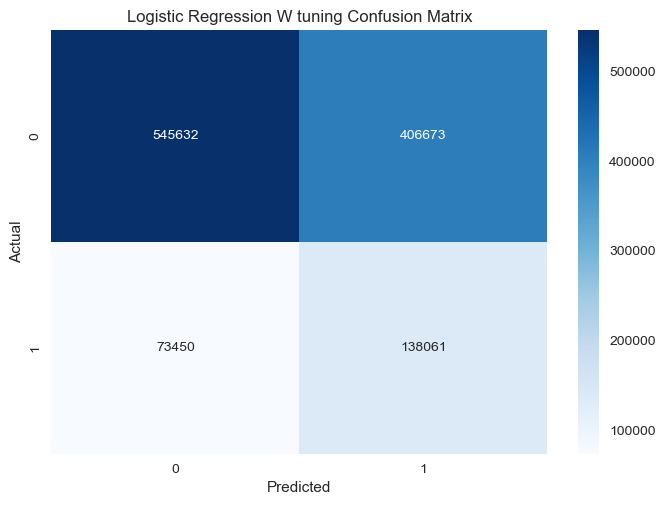

In [92]:
import warnings
warnings.filterwarnings("ignore")

 
# Retrain the model by applying hyperparameter tuning to improve accuracy
 
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import uniform
 
param_grid = {

    'C': [0.001,0.01,0.1,1,10,100],

    'solver': ['liblinear','saga'],

    'max_iter': [5000]

}
 
lr = LogisticRegression(

    class_weight = 'balanced',

    random_state=42,

)
 
rs_lr = RandomizedSearchCV(

    lr,

    param_grid,

    n_iter=10,

    cv=3,

    scoring='f1',

    random_state=42,

)
 
rs_lr.fit(X_train_scaled, y_train)
 
print("Best Params", rs_lr.best_params_)

print("Best F1 Score", rs_lr.best_score_)
 
lr_best = rs_lr.best_estimator_

y_pred_rs_lr = lr_best.predict(X_test_scaled)

print("Test Accuracy:", accuracy_score(y_test, y_pred_rs_lr))

print("\nClassification Report W tuning:\n", classification_report(y_test, y_pred_rs_lr))

cm = confusion_matrix(y_test, y_pred_rs_lr)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Logistic Regression W tuning Confusion Matrix")

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.show()
 

XGBoost Performance

Accuracy: 0.8247764251393691

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.99      0.90    952305
           1       0.63      0.09      0.15    211511

    accuracy                           0.82   1163816
   macro avg       0.73      0.54      0.53   1163816
weighted avg       0.79      0.82      0.77   1163816



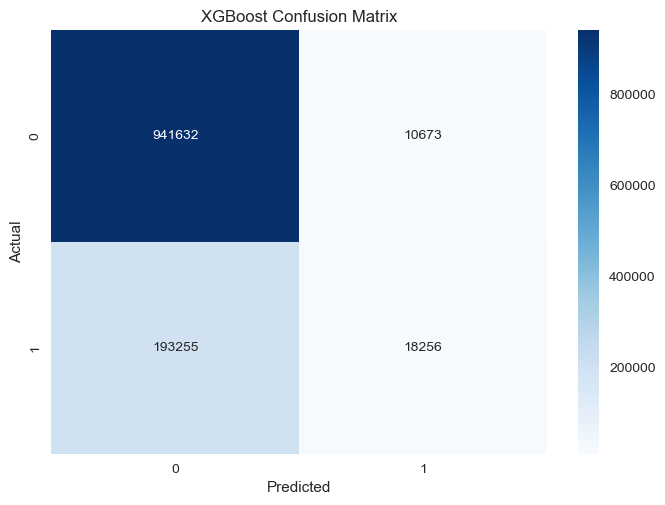

In [94]:
# Train the fourth model (XGBoost basic model)

import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
 
xgb_model = xgb.XGBClassifier(

    random_state=42,

    eval_metric = 'logloss'

)
 
xgb_model.fit(X_train,y_train)
 
y_pred_xgb = xgb_model.predict(X_test)
 
# Evaluation metrics

print('XGBoost Performance')

print("\nAccuracy:", accuracy_score(y_test, y_pred_xgb))

print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("XGBoost Confusion Matrix")

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.show()
 

Scale_pos_weight: 4.50
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.1}
XGBoost W tuning Performance

Accuracy: 0.7037839314805777

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80    952305
           1       0.34      0.67      0.45    211511

    accuracy                           0.70   1163816
   macro avg       0.62      0.69      0.62   1163816
weighted avg       0.80      0.70      0.73   1163816



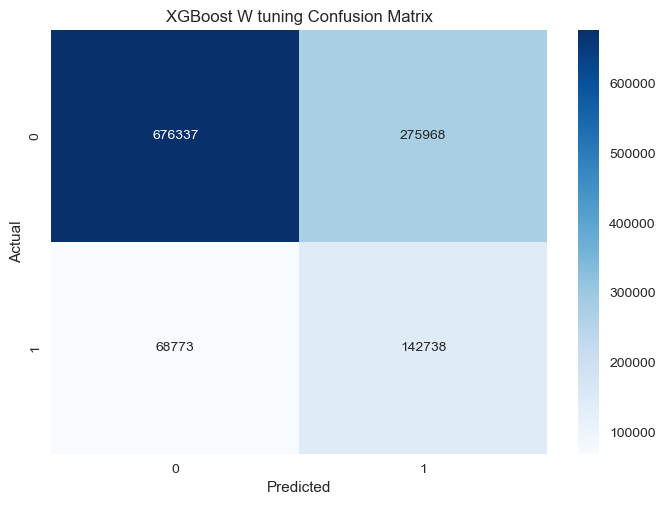

In [96]:

# Retrain the XGBoost with scale_pos_weight class imbalance technique and hyperparameter tuning
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
 
# Create a SAMPLE for tuning (20% of data)
X_sample, _, y_sample, _ = train_test_split(
    X_train, y_train, 
    train_size=0.2,  
    stratify=y_train, 
    random_state=42
)
 
 
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Scale_pos_weight: {scale_pos_weight:.2f}")
 
 
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.1, 0.3]
}
 
xgb_base = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)
 
 
rs_xgb = RandomizedSearchCV(
    xgb_base,
    param_grid,
    n_iter=10,
    cv=3,
    scoring='f1',
    random_state=42,
    n_jobs=-1,
    verbose=1
)
 
rs_xgb.fit(X_sample, y_sample)
 
print(f"Best parameters: {rs_xgb.best_params_}")
 
# Train on FULL dataset with best params
xgb_final = xgb.XGBClassifier(
    **rs_xgb.best_params_,
    scale_pos_weight=scale_pos_weight,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    n_jobs=-1
)
 
xgb_final.fit(X_train, y_train)
y_pred_xgb = xgb_final.predict(X_test)
 
 
# Evaluation metrics
print('XGBoost W tuning Performance')
print("\nAccuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost W tuning Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 

**Post-optimisation performance:** Although overall accuracy decreased to 50–80%, performance on the minority *delayed* class improved, with precision around 30% and recall increasing to approximately 57–71%, indicating more effective delay detection.
 

#### 5. Stratified Analysis                                              
- Evaluate stratified performance by airline and airport hub
- Compare feature importance using SHAP

In [98]:
# Assign the top features for stratified analysis
selected_features = xgb_final.get_booster().feature_names

In [100]:
# Calculate the metrics by airline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import pandas as pd
 
threshold = 1000

results = []
 
airlines = X_test['AIRLINE_ENCODED'].unique()
 
for a in airlines:

    mask = X_test['AIRLINE_ENCODED'] == a
 
    Xa = X_test.loc[mask, selected_features]

    ya = y_test.loc[mask]
 
    if len(ya) < threshold:

        continue
 
    yhat = xgb_final.predict(Xa)
 
    results.append({

        'airline_encoded': a,

        'n_samples': len(ya),

        'accuracy': accuracy_score(ya, yhat),

        'precision': precision_score(ya, yhat, zero_division=0),

        'recall': recall_score(ya, yhat, zero_division=0),

        'f1': f1_score(ya, yhat, zero_division=0),

        'delay_rate': ya.mean()

    })
 
airline_perf = pd.DataFrame(results).sort_values('accuracy', ascending=False)

airline_perf
 

,airline_encoded,n_samples,accuracy,precision,recall,f1,delay_rate
10,6,15242,0.914250,0.414118,0.303187,0.350075,0.076171
13,1,34574,0.846272,0.275622,0.252855,0.263748,0.108897
3,3,175691,0.784235,0.334446,0.533006,0.411001,0.141237
7,11,39425,0.751503,0.304583,0.516720,0.383255,0.149423
1,9,117439,0.718322,0.309906,0.600115,0.408737,0.162237
8,4,114528,0.717039,0.322653,0.610759,0.422242,0.169295
11,12,12475,0.714709,0.351673,0.699732,0.468091,0.179399
4,0,145388,0.700072,0.307030,0.614347,0.409437,0.169237
9,7,58937,0.686072,0.342820,0.703779,0.461054,0.190797
6,13,252041,0.666804,0.361922,0.769690,0.492338,0.209914


In [102]:
# Create encoded → airline name mapping

airline_map = (

    df_cleaned[['AIRLINE_ENCODED', 'AIRLINE']]

    .drop_duplicates()

    .set_index('AIRLINE_ENCODED')['AIRLINE']

    .to_dict()

)
 
# Add airline name column

airline_perf['airline_name'] = airline_perf['airline_encoded'].map(airline_map)


In [104]:
# Map the table based on airline names
airline_table = airline_perf[[
    'airline_name',
    'n_samples',
    'accuracy',
    'precision',
    'recall',
    'f1',
    'delay_rate'
]].sort_values('accuracy', ascending=False)
 
airline_table.round(3)

,airline_name,n_samples,accuracy,precision,recall,f1,delay_rate
10,HA,15242,0.914,0.414,0.303,0.350,0.076
13,AS,34574,0.846,0.276,0.253,0.264,0.109
3,DL,175691,0.784,0.334,0.533,0.411,0.141
7,US,39425,0.752,0.305,0.517,0.383,0.149
1,OO,117439,0.718,0.310,0.600,0.409,0.162
8,EV,114528,0.717,0.323,0.611,0.422,0.169
11,VX,12475,0.715,0.352,0.700,0.468,0.179
4,AA,145388,0.700,0.307,0.614,0.409,0.169
9,MQ,58937,0.686,0.343,0.704,0.461,0.191
6,WN,252041,0.667,0.362,0.770,0.492,0.210


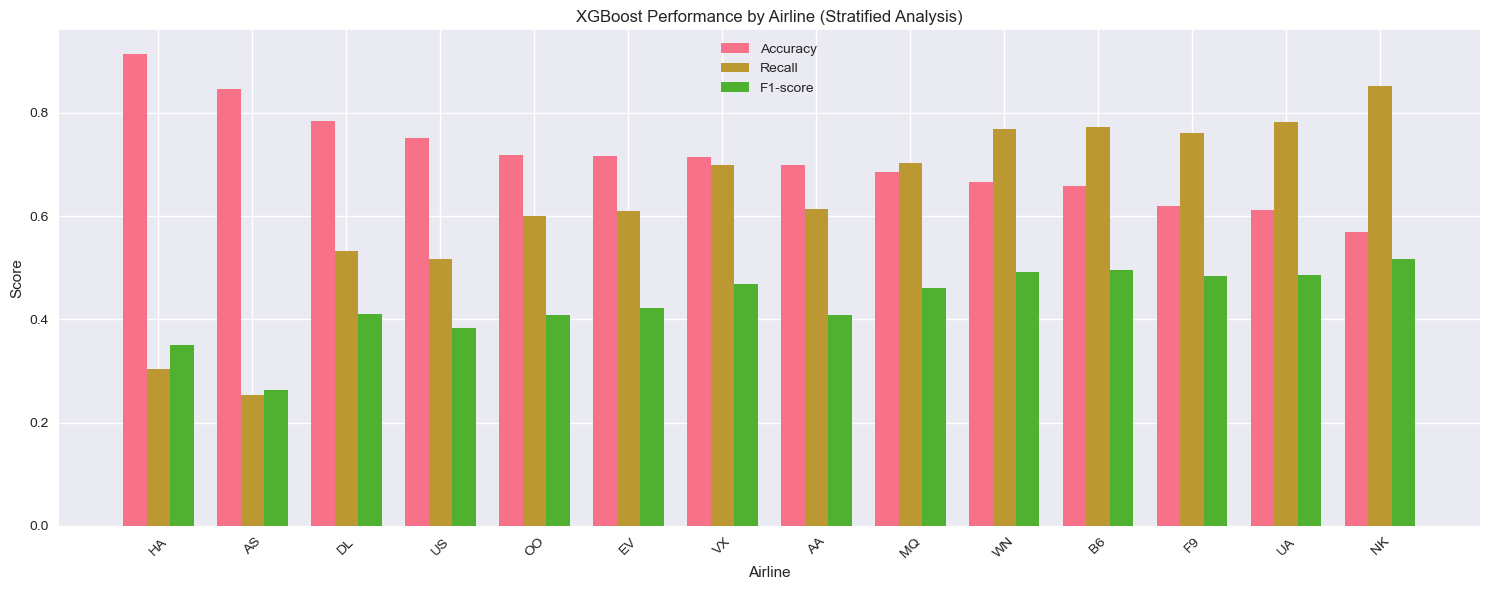

In [106]:
# Visualise accuracy, recall and F1 score for all airlines

import matplotlib.pyplot as plt

import numpy as np
 
airline_plot = airline_table.copy()
 
metrics = ['accuracy', 'recall', 'f1']

x = np.arange(len(airline_plot))

width = 0.25
 
plt.figure(figsize=(15,6))
 
plt.bar(x - width, airline_plot['accuracy'], width, label='Accuracy')

plt.bar(x,         airline_plot['recall'],   width, label='Recall')

plt.bar(x + width, airline_plot['f1'],       width, label='F1-score')
 
plt.xlabel("Airline")

plt.ylabel("Score")

plt.title("XGBoost Performance by Airline (Stratified Analysis)")

plt.xticks(x, airline_plot['airline_name'], rotation=45)

plt.legend()

plt.tight_layout()

plt.show()
 

In [110]:
# Sort by recall

airline_perf_sorted = airline_perf.sort_values('recall', ascending=False)
 
# Pick top 3 and bottom 3 airlines for SHAP analysis

top_recall = airline_perf_sorted.head(3)

low_recall = airline_perf_sorted.tail(3)
 
selected_airlines = pd.concat([top_recall, low_recall])['airline_encoded'].tolist()

selected_airlines
 

[8, 10, 2, 11, 6, 1]

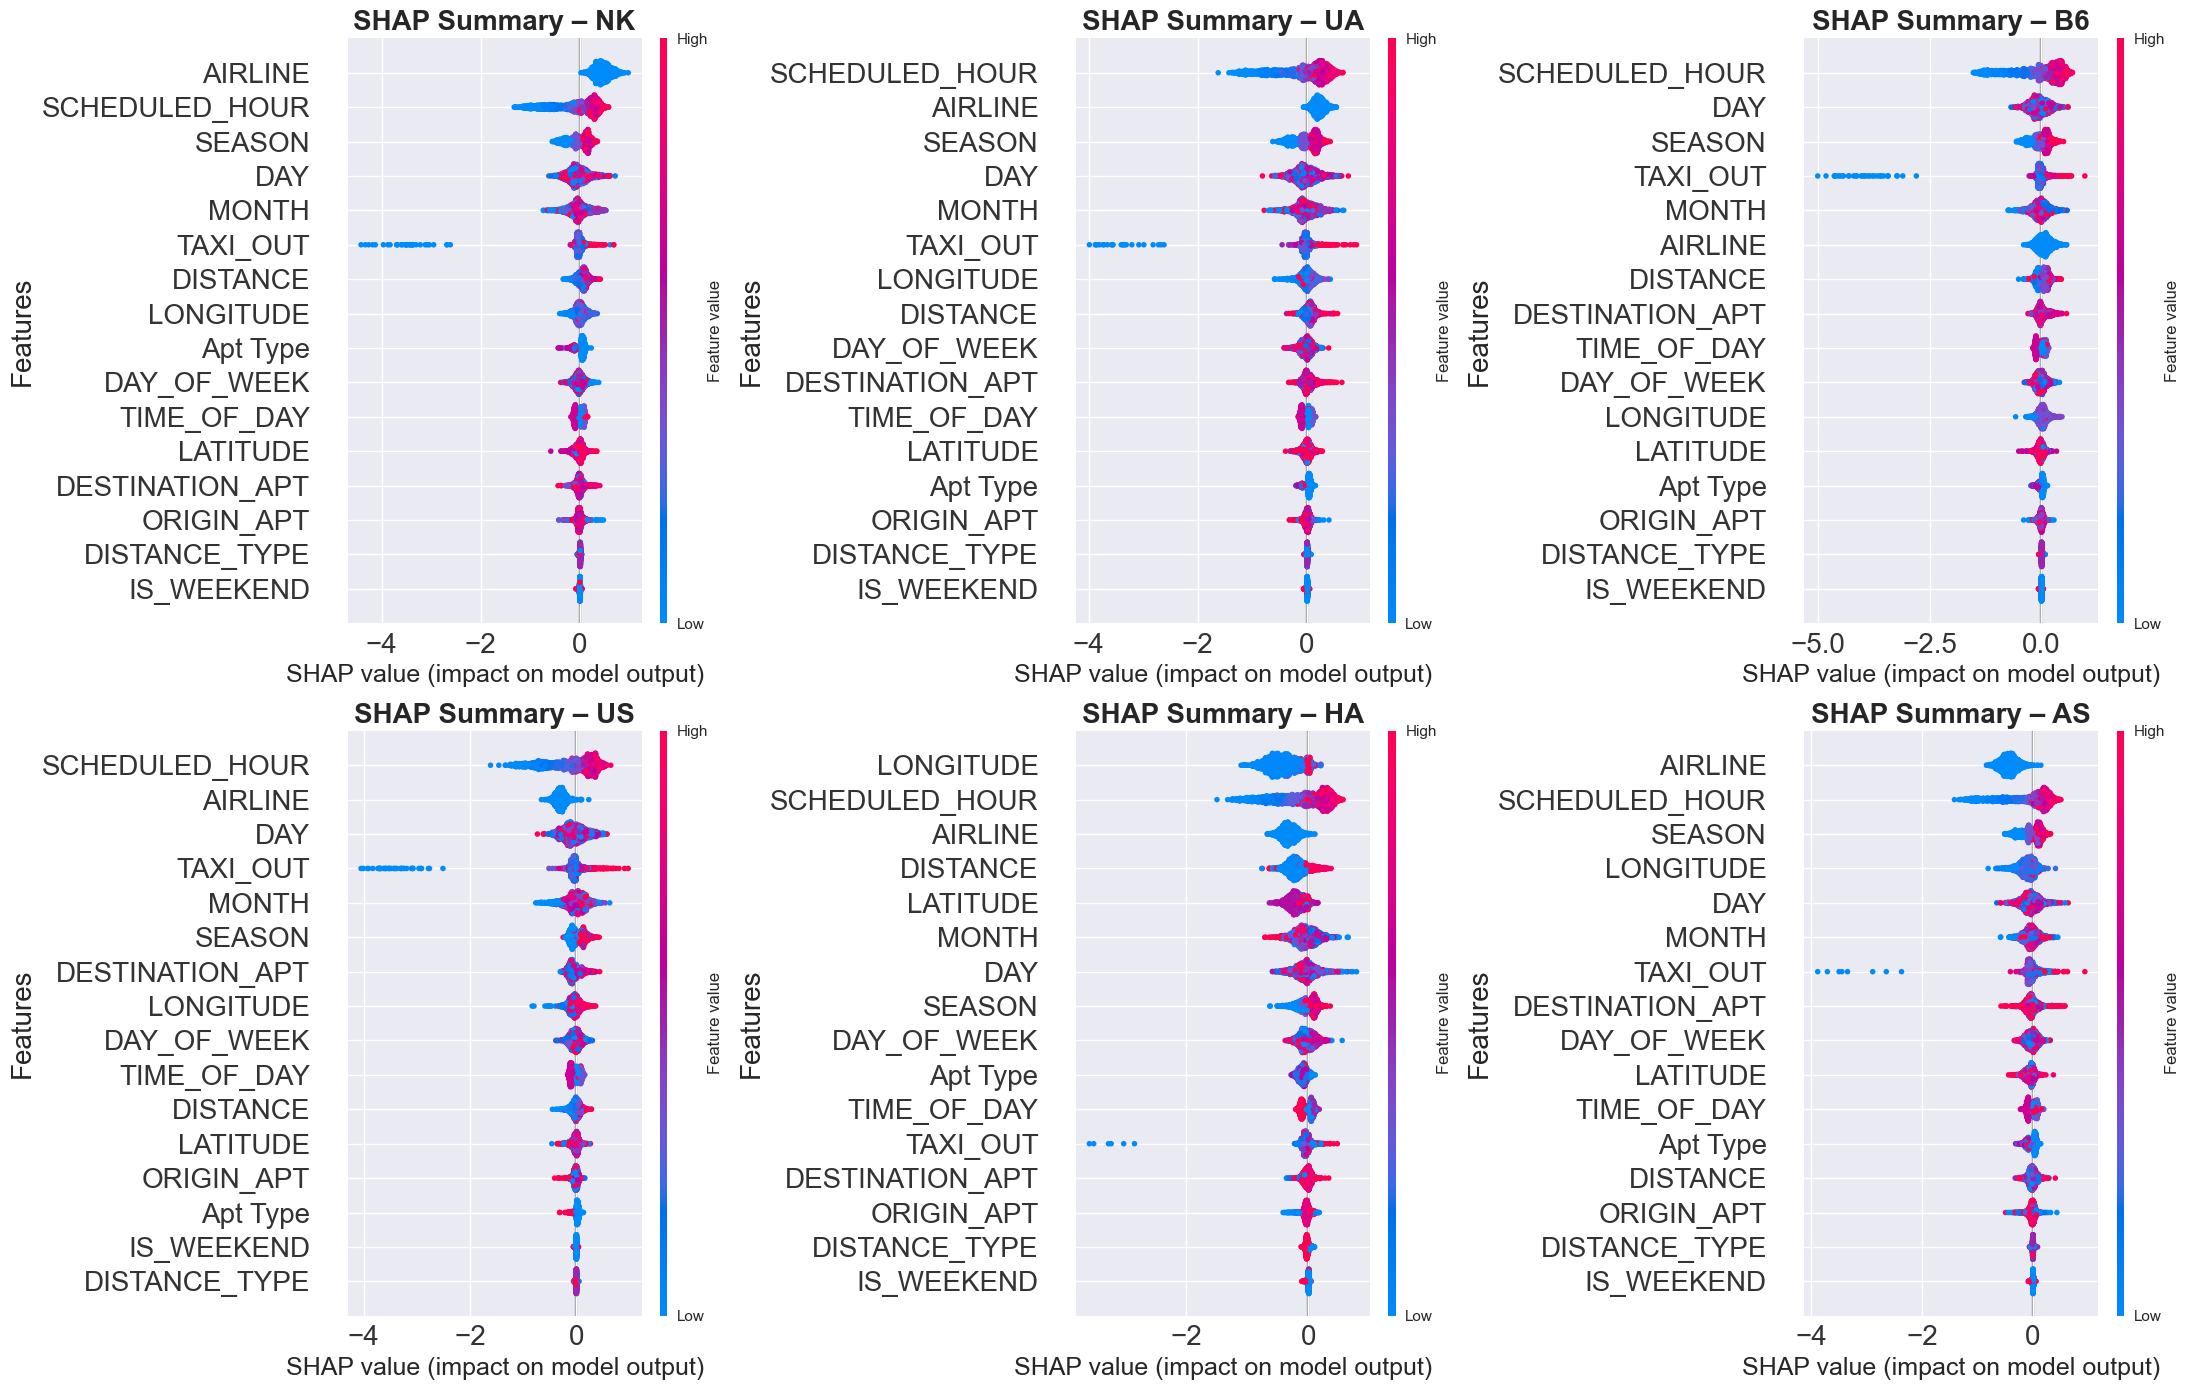


SHAP FEATURE IMPORTANCE BY AIRLINE


                   NK    UA    B6    US    HA    AS
AIRLINE          0.45  0.22  0.12  0.29  0.31  0.43
SCHEDULED_HOUR   0.34  0.36  0.42  0.35  0.35  0.32
SEASON           0.17  0.17  0.15  0.10  0.11  0.14
MONTH            0.15  0.14  0.13  0.14  0.14  0.10
DAY              0.15  0.16  0.16  0.16  0.13  0.12
TAXI_OUT         0.11  0.10  0.14  0.15  0.07  0.09
DISTANCE         0.09  0.08  0.10  0.06  0.21  0.06
DAY_OF_WEEK      0.08  0.08  0.09  0.08  0.10  0.08
LONGITUDE        0.08  0.09  0.08  0.08  0.40  0.13
Apt Type         0.08  0.05  0.04  0.03  0.09  0.07
LATITUDE         0.07  0.06  0.06  0.05  0.20  0.08
TIME_OF_DAY      0.07  0.07  0.09  0.07  0.08  0.07
DESTINATION_APT  0.06  0.07  0.09  0.09  0.05  0.09
ORIGIN_APT       0.05  0.04  0.04  0.03  0.05  0.05
IS_WEEKEND       0.01  0.01  0.01  0.01  0.01  0.01
DISTANCE_TYPE    0.01  0.01  0.01  0.01  0.03  0.01

TOP 5 FEATURES PER AIRLINE

NK                              UA               

In [112]:
# SHAP feature calculation by airline
import shap
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Clean feature names
def clean_feature_name(name):
    name = name.replace('_ENCODED', '').replace('ENCODED', '')
    name = name.replace('AIRPORT', 'APT').replace('Airport', 'Apt')
    name = name.replace('CATEGORY', 'TYPE').replace('Category', 'Type')
    return name
 
cleaned_features = [clean_feature_name(f) for f in selected_features]
 
# Initialise SHAP
explainer = shap.TreeExplainer(xgb_final)
 
n_airlines = len(selected_airlines)
n_cols = 3
n_rows = math.ceil(n_airlines / n_cols)
 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 7 * n_rows))
axes = axes.flatten()
 
shap_summary = {}
 
for i, a in enumerate(selected_airlines):
 
    airline_name = airline_map[a]
 
    Xa = X_test.loc[X_test['AIRLINE_ENCODED'] == a, selected_features]
    Xa_sample = Xa.sample(n=min(2000, len(Xa)), random_state=42)
 
    shap_values = explainer.shap_values(Xa_sample)
 
    mean_abs_shap = np.abs(shap_values).mean(axis=0)
    shap_summary[airline_name] = mean_abs_shap
 
    plt.sca(axes[i])
    shap.summary_plot(
        shap_values,
        Xa_sample,
        feature_names=cleaned_features,
        show=False,
        plot_size=None
    )
    axes[i].set_title(
        f"SHAP Summary – {airline_name}",
        fontsize=20,
        fontweight='bold'
    )
 
    axes[i].set_xlabel(
        "SHAP value (impact on model output)",
        fontsize=18
    )
    axes[i].set_ylabel(
        "Features",
        fontsize=20
    )
 
   
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=20)
 
# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
 
plt.tight_layout()
plt.savefig('shap_airline_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
 
print("\n" + "="*80)
print("SHAP FEATURE IMPORTANCE BY AIRLINE")
print("="*80)
 
shap_table = pd.DataFrame(shap_summary, index=cleaned_features)
shap_table = shap_table.round(2)
shap_table = shap_table.sort_values(shap_table.columns[0], ascending=False)
 
print("\n")
print(shap_table)
 
 
print("\n" + "="*80)
print("TOP 5 FEATURES PER AIRLINE")
print("="*80)
 
airlines = list(shap_table.columns)
n_airlines = len(airlines)
n_per_row = 3
 
for row_start in range(0, n_airlines, n_per_row):
    row_airlines = airlines[row_start:row_start + n_per_row]
    # Print header
    header = ""
    for airline in row_airlines:
        header += f"{airline:30s}  "
    print(f"\n{header}")
    print("-" * len(header))
    # Print top 5 features
    for rank in range(1, 6):
        line = ""
        for airline in row_airlines:
            top_5 = shap_table[airline].sort_values(ascending=False).head(5)
            if rank <= len(top_5):
                feature = top_5.index[rank-1]
                value = top_5.iloc[rank-1]
                line += f"{rank}. {feature:20s} {value:.2f}   "
            else:
                line += " " * 30
        print(line)

### 5.1 Below is the summary of findings from Airline Stratified Analysis: 

#### What Works Well (Reduces Delay Risk)
 
**Top 3 volume airlines**

**NK(Spirit Airlines)** - Consistent internal operations (AIRLINE); better performance outside peak SCHEDULED_HOUR.
 
**UA(United Airlines)** - Predictable scheduling effects (SCHEDULED_HOUR, SEASON).
 
**B6(JetBlue Airways)** - Strong time-based planning (SCHEDULED_HOUR, MONTH).
 
**Bottom 3 volume airlines**
 
**US(US Airways)** - Stable seasonal patterns (MONTH, SEASON).
 
**HA(Hawaiian Airlines)** - Geographic and route stability (DISTANCE, LATITUDE/LONGITUDE).
 
**AS(Alaska Airlines)** - Strong airline-level consistency (AIRLINE); balanced scheduling. 

#### What Affects Delay (Increases Delay Risk)
 
**Top 3 volume airlines**
 
**NK(Spirit Airlines)** - High sensitivity to peak scheduling (SCHEDULED_HOUR); delays rise during busy DAY/SEASON periods.
 
**UA(United Airlines** - Peak-hour congestion and route complexity (DAY, AIRLINE).
 
**B6(JetBlue Airways)** - Ground congestion impacts (TAXI_OUT); variability by DAY/TIME_OF_DAY.
 
**Bottom 3 volume airlines**
 
**US(US Airways)** - Pushback and runway congestion (TAXI_OUT); weekday variability (DAY).
 
**HA(Hawaiian Airlines)** - Long-haul and island routing sensitivity; seasonal demand (SEASON).
 
**AS(Alaska Airlines)** - Regional geography and peak-hour exposure (LONGITUDE, SCHEDULED_HOUR).
 

In [114]:
# Calculate the metrics by airport hub type                                       
 
threshold = 1000

results = []
 
hub_type = X_test['Airport Type_ENCODED'].unique()
 
for a in hub_type:

    mask = X_test['Airport Type_ENCODED'] == a
 
    Xa = X_test.loc[mask, selected_features]

    ya = y_test.loc[mask]
 
    if len(ya) < threshold:

        continue
 
    yhat = xgb_final.predict(Xa)
 
    results.append({

        'Airport Type_ENCODED': a,

        'n_samples': len(ya),

        'accuracy': accuracy_score(ya, yhat),

        'precision': precision_score(ya, yhat, zero_division=0),

        'recall': recall_score(ya, yhat, zero_division=0),

        'f1': f1_score(ya, yhat, zero_division=0),

        'delay_rate': ya.mean()

    })
 
hub_perf = pd.DataFrame(results).sort_values('accuracy', ascending=False)

hub_perf
 


,Airport Type_ENCODED,n_samples,accuracy,precision,recall,f1,delay_rate
5,4,2133,0.827473,0.336336,0.432432,0.378378,0.121425
3,5,97463,0.812442,0.293433,0.381253,0.331627,0.122046
1,2,51557,0.766239,0.321204,0.544788,0.404133,0.145509
4,3,98401,0.751496,0.327313,0.592728,0.421737,0.152885
2,1,196842,0.724073,0.342570,0.668341,0.452965,0.170929
0,0,717420,0.672055,0.345096,0.716656,0.465862,0.199555


**RQ1:What are the key factors influencing departure and arrival delays in domestic U.S. flights, and how do these vary by airline and airport?** 

In [116]:
# Create encoded → aiport hub mapping

hub_map = (

    df_cleaned[['Airport Type_ENCODED', 'Airport Type']]

    .drop_duplicates()

    .set_index('Airport Type_ENCODED')['Airport Type']

    .to_dict()

)
 
# Add hub name column

hub_perf['Airport_Hub'] = hub_perf['Airport Type_ENCODED'].map(hub_map)
 

In [118]:
# Map the table based on hub type names
hub_table = hub_perf[[
    'Airport_Hub',
    'n_samples',
    'accuracy',
    'precision',
    'recall',
    'f1',
    'delay_rate'
]].sort_values('accuracy', ascending=False)
 
hub_table.round(3)

,Airport_Hub,n_samples,accuracy,precision,recall,f1,delay_rate
5,Unknown,2133,0.827,0.336,0.432,0.378,0.121
3,NaN,97463,0.812,0.293,0.381,0.332,0.122
1,Non-Hub,51557,0.766,0.321,0.545,0.404,0.146
4,Small,98401,0.751,0.327,0.593,0.422,0.153
2,Medium,196842,0.724,0.343,0.668,0.453,0.171
0,Large,717420,0.672,0.345,0.717,0.466,0.200


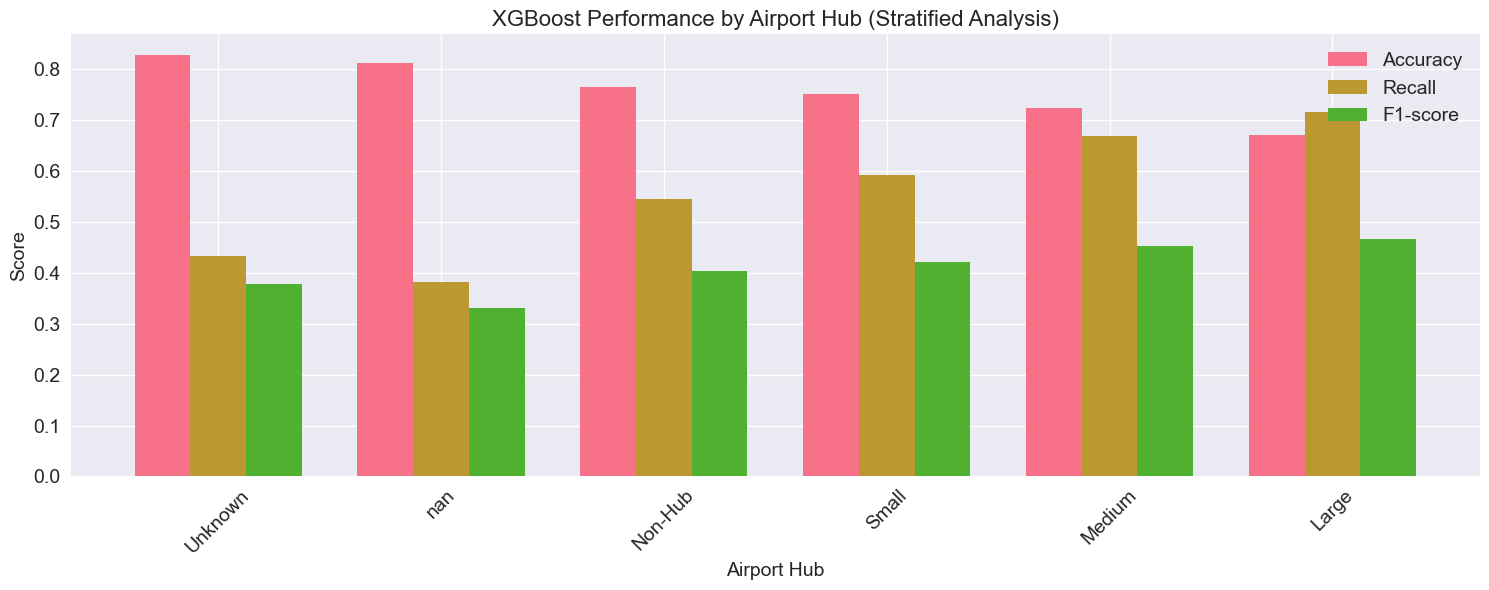

In [120]:
# Visualise accuracy, recall and F1 score for all airport hubs

import numpy as np
 
hub_plot = hub_table.copy()
 
metrics = ['accuracy', 'recall', 'f1']

x = np.arange(len(hub_plot))

width = 0.25
 
plt.figure(figsize=(15,6))
 
plt.bar(x - width, hub_plot['accuracy'], width, label='Accuracy')

plt.bar(x,         hub_plot['recall'],   width, label='Recall')

plt.bar(x + width, hub_plot['f1'],       width, label='F1-score')
 
plt.xlabel("Airport Hub", fontsize=14)

plt.ylabel("Score", fontsize=14)

plt.title("XGBoost Performance by Airport Hub (Stratified Analysis)", fontsize=16)

plt.xticks(x, hub_plot['Airport_Hub'], rotation=45, fontsize=14)

plt.yticks(fontsize=14)

plt.legend(fontsize=14)

plt.tight_layout()

plt.show()
 

In [122]:
# Manually Define selected_hub_types for the loop
selected_hub_types = X_test['Airport Type_ENCODED'].unique()  
 
# Create hub_map dictionary
hub_map = {
    0: 'Large Hub',
    1: 'Medium Hub', 
    2: 'Small Hub',
    3: 'Non-Hub'
}

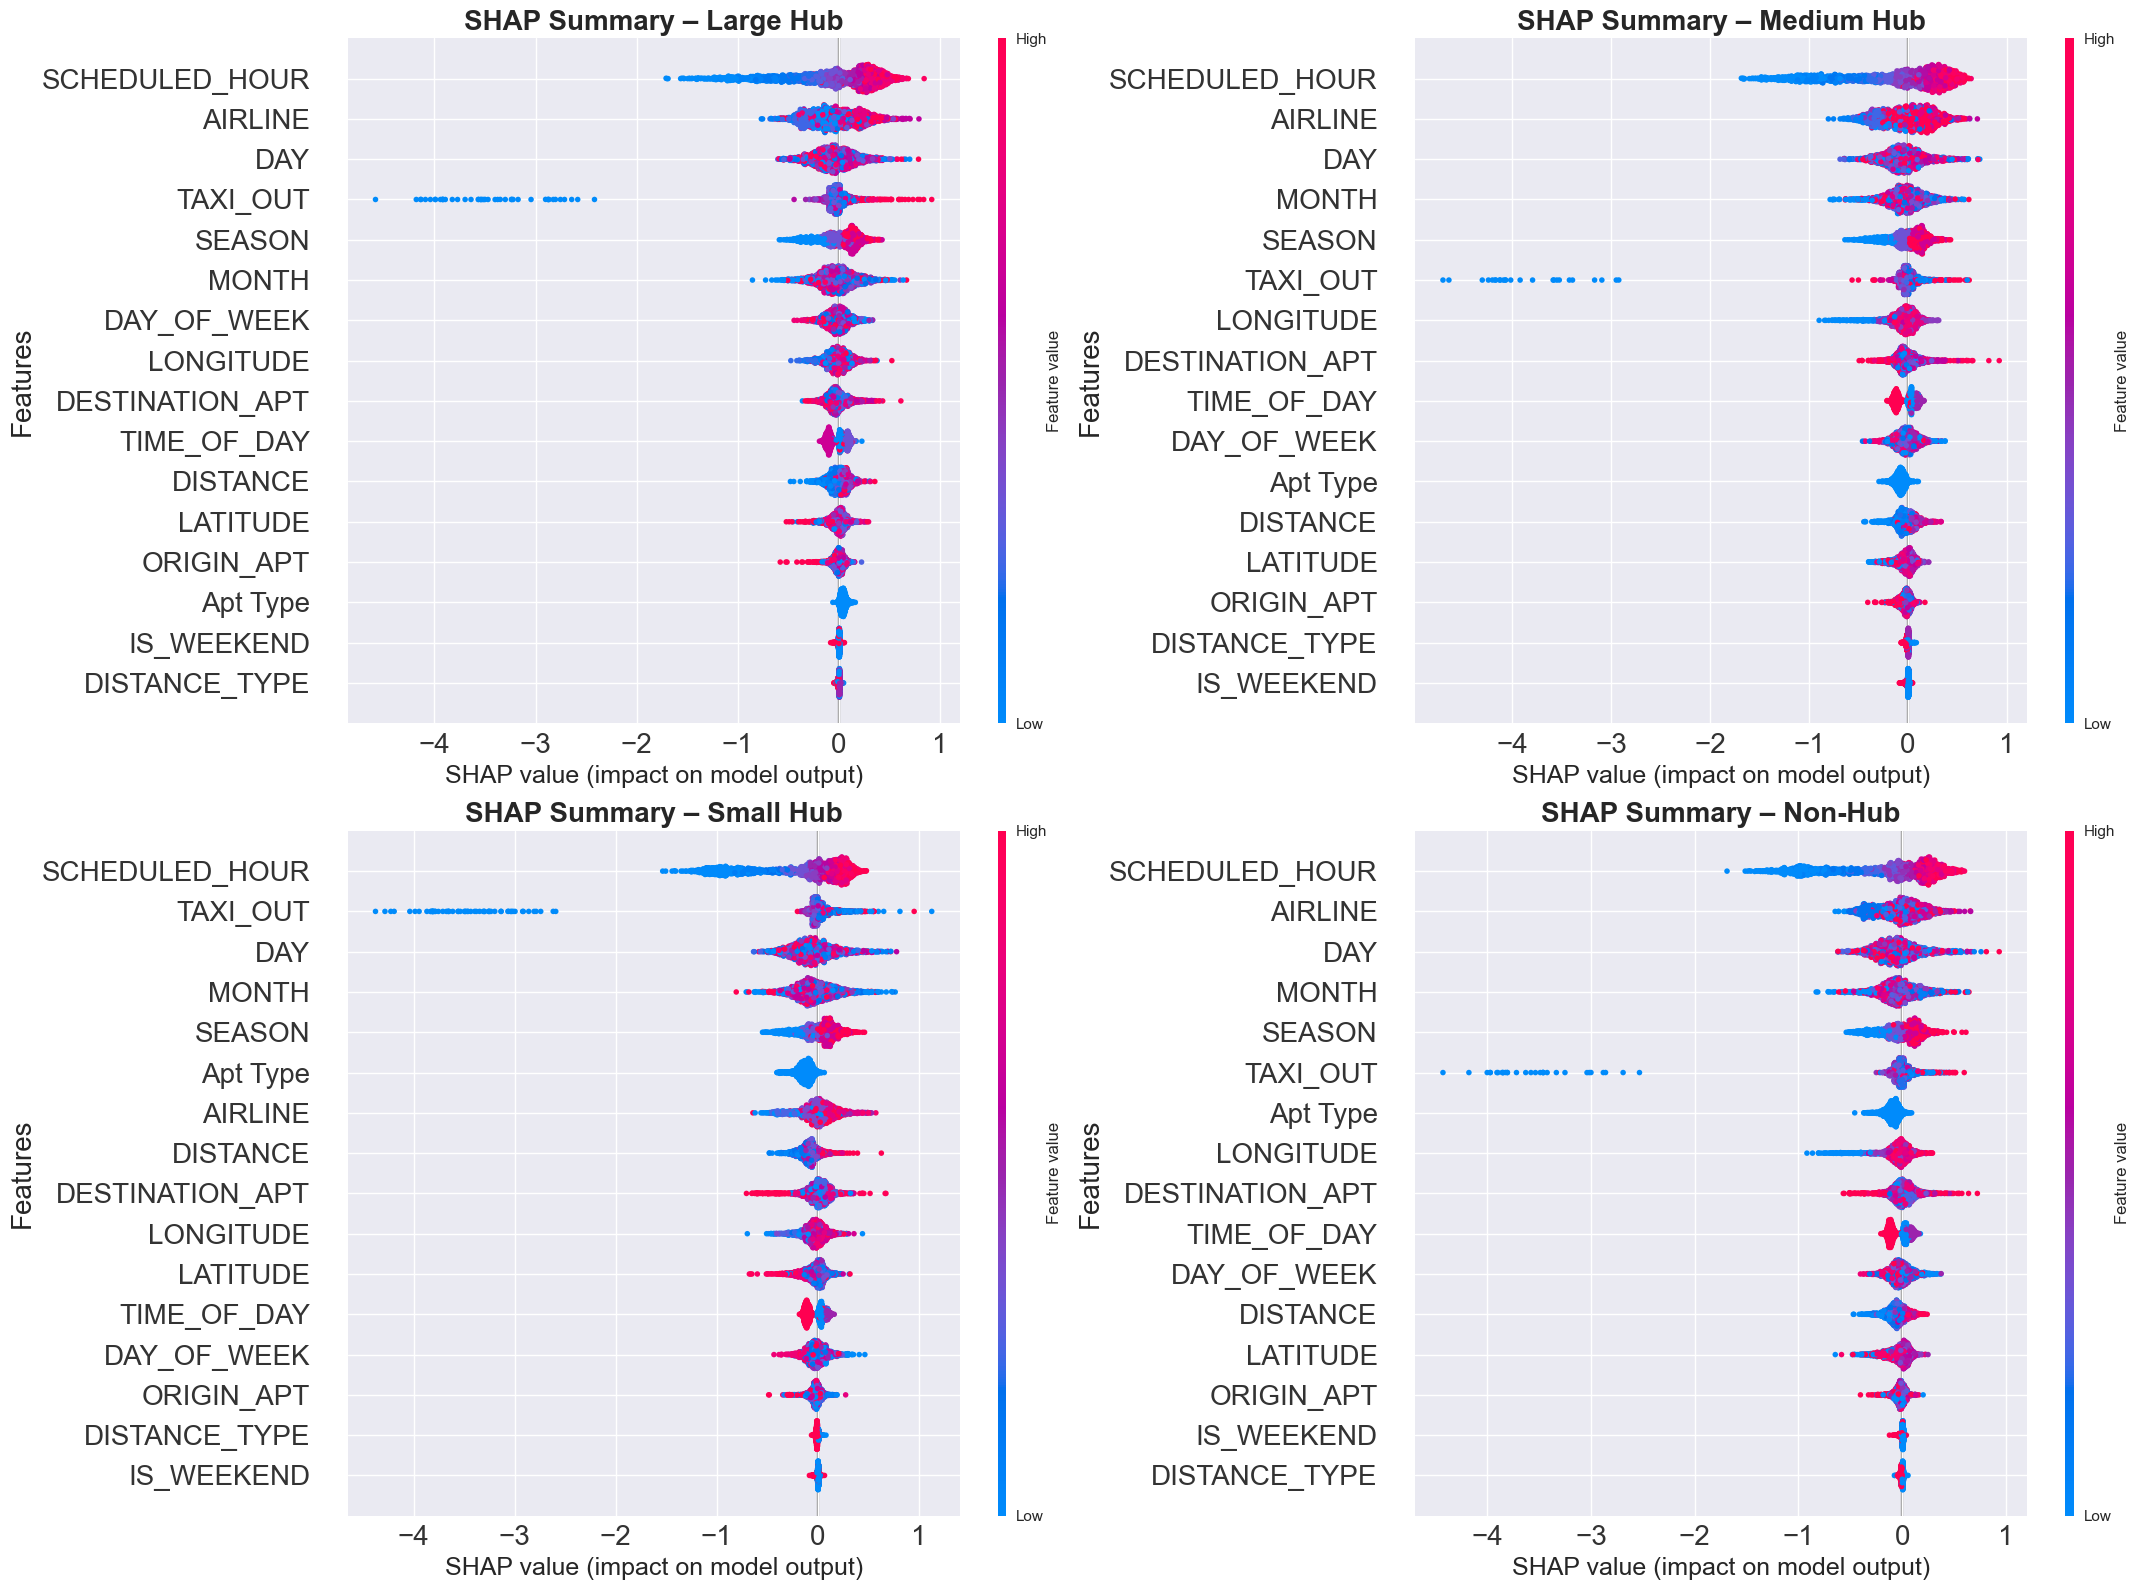


SHAP FEATURE IMPORTANCE BY AIRLINE


                 Large Hub  Medium Hub  Small Hub  Non-Hub
SCHEDULED_HOUR        0.36        0.42       0.37     0.39
AIRLINE               0.21        0.20       0.12     0.17
DAY                   0.16        0.15       0.16     0.16
TAXI_OUT              0.15        0.11       0.17     0.11
SEASON                0.15        0.13       0.13     0.14
MONTH                 0.14        0.14       0.15     0.14
DAY_OF_WEEK           0.08        0.08       0.08     0.08
LONGITUDE             0.08        0.10       0.08     0.09
DESTINATION_APT       0.08        0.09       0.09     0.09
DISTANCE              0.07        0.07       0.11     0.08
TIME_OF_DAY           0.07        0.09       0.08     0.08
LATITUDE              0.06        0.07       0.08     0.08
ORIGIN_APT            0.04        0.05       0.04     0.04
Apt Type              0.04        0.08       0.13     0.09
IS_WEEKEND            0.01        0.01       0.01     0.01
DISTANCE_TYPE     

In [125]:

 # SHAP feature calculation by airport hub

import shap

import math

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
 
# Clean feature names

def clean_feature_name(name):

    name = name.replace('_ENCODED', '').replace('ENCODED', '')

    name = name.replace('AIRPORT', 'APT').replace('Airport', 'Apt')

    name = name.replace('CATEGORY', 'TYPE').replace('Category', 'Type')

    return name
 
cleaned_features = [clean_feature_name(f) for f in selected_features]
 
# Initialise SHAP

explainer = shap.TreeExplainer(xgb_final)

n_hub = len(hub_map)

n_cols = 2

n_rows = math.ceil(n_hub / n_cols)
 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 8 * n_rows))

axes = axes.flatten()
 
shap_summary = {}
 
for i, a in enumerate(hub_map):

    airport_type = hub_map[a]
 
    Xa = X_test.loc[X_test['Airport Type_ENCODED'] == a, selected_features]

    Xa_sample = Xa.sample(n=min(2000, len(Xa)), random_state=42)
 
    shap_values = explainer.shap_values(Xa_sample)
 
    mean_abs_shap = np.abs(shap_values).mean(axis=0)

    shap_summary[airport_type] = mean_abs_shap
 
    plt.sca(axes[i])

    shap.summary_plot(

        shap_values,

        Xa_sample,

        feature_names=cleaned_features,

        show=False,

        plot_size=None

    )
 
    

    axes[i].set_title(

        f"SHAP Summary – {airport_type}",

        fontsize=20,

        fontweight='bold'

    )
 
    

    axes[i].set_xlabel("SHAP value (impact on model output)", fontsize=18)

    axes[i].set_ylabel("Features", fontsize=20)
 
    

    axes[i].tick_params(axis='x', labelsize=20)

    axes[i].tick_params(axis='y', labelsize=20)
 
# Remove empty subplots

for j in range(i + 1, len(axes)):

    fig.delaxes(axes[j])
 
plt.tight_layout()

plt.savefig('shap_airport_hub_comparison.png', dpi=300, bbox_inches='tight')

plt.show()

print("\n" + "="*80)

print("SHAP FEATURE IMPORTANCE BY AIRLINE")

print("="*80)
 
shap_table = pd.DataFrame(shap_summary, index=cleaned_features)

shap_table = shap_table.round(2)

shap_table = shap_table.sort_values(shap_table.columns[0], ascending=False)
 
print("\n")

print(shap_table)
 
print("\n" + "="*80)

print("TOP 5 FEATURES PER AIRLINE")

print("="*80)
 
hub_list = list(shap_table.columns)  

n_hub = len(hub_list)

n_per_row = 3
 
for row_start in range(0, n_hub, n_per_row):

    row_hub = hub_list[row_start:row_start + n_per_row]

    # Print header

    header = ""

    for h in row_hub:  

        header += f"{h:30s}  "

    print(f"\n{header}")

    print("-" * len(header))

    # Print top 5 features

    for rank in range(1, 6):

        line = ""

        for h in row_hub:  

            top_5 = shap_table[h].sort_values(ascending=False).head(5)

            if rank <= len(top_5):

                feature = top_5.index[rank-1]

                value = top_5.iloc[rank-1]

                line += f"{rank}. {feature:20s} {value:.2f}   "

            else:

                line += " " * 30

        print(line)
 

### 5.2 Below is the summary of findings from Airport Hub Stratified Analysis:

#### What Works Well (Reduces Delay Risk)
 
**Large Hub** - Predictable scheduling effects (SCHEDULED_HOUR); airline operations are relatively stable (AIRLINE). 

**Medium Hub** - Strong performance outside peak SCHEDULED_HOUR; moderate airline-level consistency. 

**Small Hub** - Simpler scheduling patterns (SCHEDULED_HOUR); less airline-driven complexity.
 
**Non-Hub** - Lower congestion and predictable timing (SCHEDULED_HOUR). 

#### What Affects Delay (Increases Delay Risk)
 
**Large Hub** - Congestion during peak hours (SCHEDULED_HOUR, TAXI_OUT); seasonal demand (SEASON).

**Medium Hub** - Variability from airport characteristics (Apt Type) and destination effects.
 
**Small Hub** - Ground operations and capacity constraints (TAXI_OUT, DISTANCE, Apt Type).
 
**Non-Hub** - Sensitivity to airline choice and seasonal travel surges (AIRLINE, SEASON).
 
 


**RQ2:To what extent do machine learning models predict flight arrival delays based on
operational and environmental features, and how do these predictions differ across
airlines and routes?**

In [127]:
# Create a Route column in the original cleaned dataframe and map these routes to X_test
df_cleaned['ROUTE'] = df_cleaned['ORIGIN_AIRPORT'].astype(str) + ' → ' + df_cleaned['DESTINATION_AIRPORT'].astype(str)
 
X_test_routes = df_cleaned.loc[X_test.index, 'ROUTE']
 

In [129]:
# Create the ROUTE string in your main dataframe 

df_cleaned['ROUTE'] = (

    df_cleaned['ORIGIN_AIRPORT'].astype(str) + 

    ' → ' + 

    df_cleaned['DESTINATION_AIRPORT'].astype(str)

)
 
# Define X_test_routes by pulling the ROUTE names for the specific rows in X_test

X_test_routes = df_cleaned.loc[X_test.index, 'ROUTE']
 
y_pred_all = xgb_final.predict(X_test[selected_features])
 
# Initialise route_eval as a DataFrame to store our results

route_eval = pd.DataFrame({'route_name': X_test_routes})

route_eval['y_true'] = y_test.values

route_eval['y_pred'] = y_pred_all
 

In [131]:
# Aggregate metrics per route
 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
 
threshold = 1000
results = []
 
for r, g in route_eval.groupby('route_name'):
    if len(g) < threshold:
        continue
 
    results.append({
        'route': r,
        'n_samples': len(g),
        'accuracy': accuracy_score(g['y_true'], g['y_pred']),
        'precision': precision_score(g['y_true'], g['y_pred'], zero_division=0),
        'recall': recall_score(g['y_true'], g['y_pred'], zero_division=0),
        'f1': f1_score(g['y_true'], g['y_pred'], zero_division=0),
        'delay_rate': g['y_true'].mean()
    })
 
route_perf = pd.DataFrame(results)
top_routes = route_perf.sort_values('recall', ascending=False).head(10)
top_routes

,route,n_samples,accuracy,precision,recall,f1,delay_rate
57,LAS → SFO,1565,0.607668,0.398332,0.911695,0.554427,0.267732
79,MCO → JFK,1073,0.643057,0.428341,0.904762,0.581421,0.273998
95,ORD → SFO,1446,0.512448,0.396869,0.896050,0.550096,0.332642
59,LAX → DEN,1150,0.595652,0.369723,0.888112,0.522097,0.248696
90,ORD → DEN,1127,0.525288,0.388820,0.879213,0.539190,0.315883
64,LAX → OAK,1283,0.603274,0.387139,0.875371,0.536852,0.262666
28,DEN → LAX,1105,0.607240,0.394777,0.865320,0.542194,0.268778
93,ORD → LGA,1915,0.602089,0.372744,0.860417,0.520151,0.250653
105,SAN → SFO,1396,0.613897,0.375000,0.857143,0.521739,0.245702
94,ORD → MSP,1289,0.602017,0.406452,0.855978,0.551181,0.285493


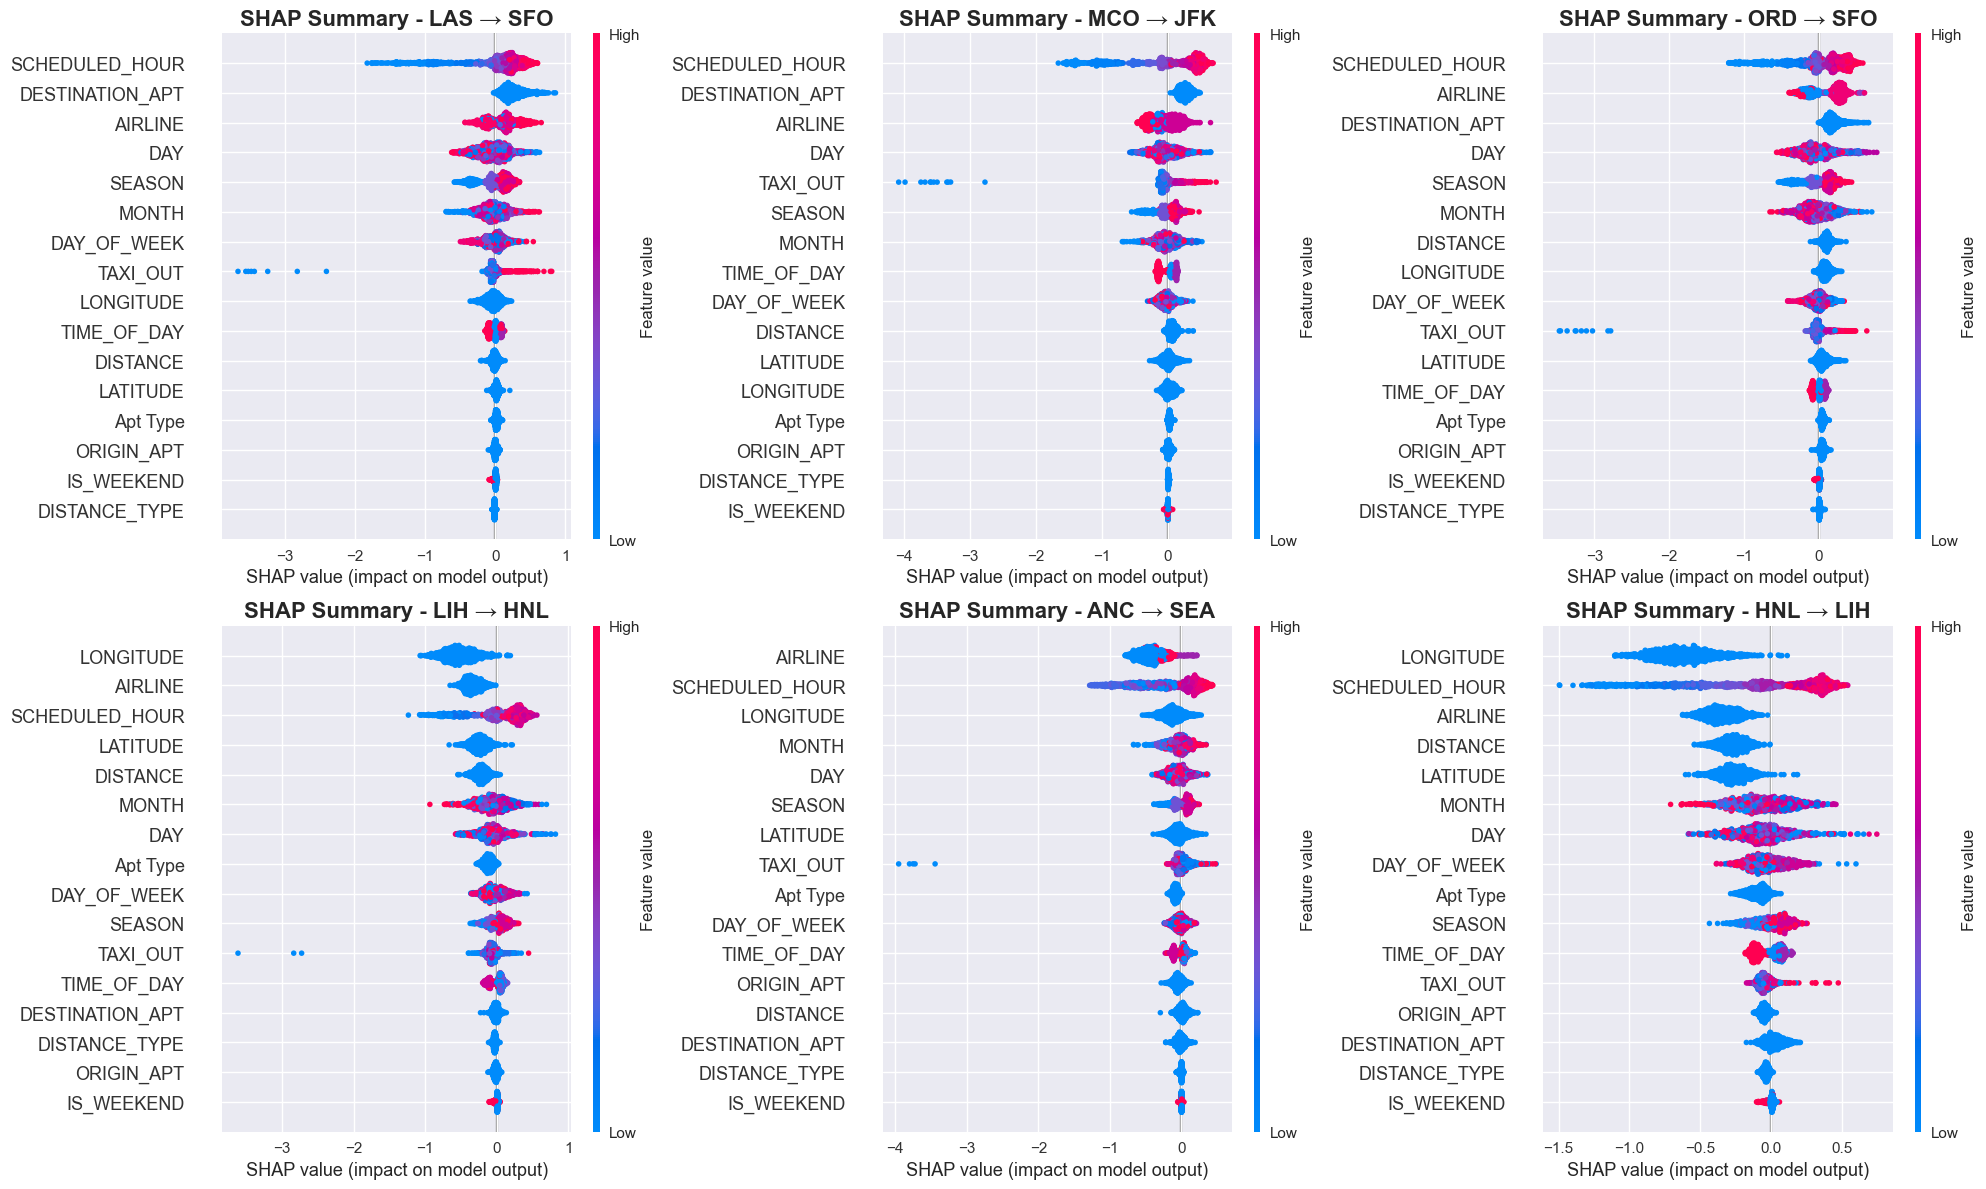


TOP 5 FEATURES PER ROUTE

LAS → SFO                       MCO → JFK                       ORD → SFO                       
------------------------------------------------------------------------------------------------
1. SCHEDULED_HOUR       0.34   1. SCHEDULED_HOUR       0.50   1. SCHEDULED_HOUR       0.29   
2. DESTINATION_APT      0.25   2. DESTINATION_APT      0.26   2. AIRLINE              0.22   
3. AIRLINE              0.18   3. AIRLINE              0.18   3. DESTINATION_APT      0.18   
4. DAY                  0.17   4. DAY                  0.16   4. DAY                  0.17   
5. SEASON               0.16   5. TAXI_OUT             0.15   5. SEASON               0.16   

LIH → HNL                       ANC → SEA                       HNL → LIH                       
------------------------------------------------------------------------------------------------
1. LONGITUDE            0.52   1. AIRLINE              0.42   1. LONGITUDE            0.61   
2. AIRLINE          

In [133]:
# SHAP feature calculation by top 3 and bottom 3 routes, 
# Visualise by summary_plot  
# View values with top features affecting each routes in a tabular format
import shap
import math
import matplotlib.pyplot as plt
import numpy as np
 
# Pick top 3 and bottom 3 routes
route_perf_sorted = route_perf.sort_values('recall', ascending=False)
top_recall_routes = route_perf_sorted.head(3)
low_recall_routes = route_perf_sorted.tail(3)
 
selected_routes = pd.concat([top_recall_routes, low_recall_routes])['route'].tolist()
 
 
def clean_feature_name(name):
    name = name.replace('_ENCODED', '').replace('ENCODED', '')
    name = name.replace('AIRPORT', 'APT').replace('Airport', 'Apt')
    name = name.replace('CATEGORY', 'TYPE').replace('Category', 'Type')
    return name
 
cleaned_features = [clean_feature_name(f) for f in selected_features]
 
# Initialize SHAP
explainer = shap.TreeExplainer(xgb_final)
n_routes = len(selected_routes)
n_cols = 3  
n_rows = math.ceil(n_routes / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
axes = axes.flatten() if n_routes > 1 else [axes]
 
shap_summary_route = {}
 
for i, r in enumerate(selected_routes):
    # Filter X_test using the route name mask
    mask = X_test_routes == r
    Xr = X_test.loc[mask, selected_features]
    Xr_sample = Xr.sample(n=min(2000, len(Xr)), random_state=42)
    shap_values = explainer.shap_values(Xr_sample)
    mean_abs_shap = np.abs(shap_values).mean(axis=0)
    shap_summary_route[r] = mean_abs_shap
    plt.sca(axes[i])
    shap.summary_plot(
        shap_values,
        Xr_sample,
        feature_names=cleaned_features,
        show=False,
        plot_size=None  
    )
    axes[i].set_title(f"SHAP Summary - {r}", fontsize=16, fontweight='bold')
 
# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
 
plt.tight_layout()
plt.savefig('shap_route_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
 
    # Print header
print("\n" + "="*80)
print("TOP 5 FEATURES PER ROUTE")
print("="*80)
 
shap_table_route = pd.DataFrame(shap_summary_route, index=cleaned_features).round(2)
routes_list = list(shap_table_route.columns)
 
for row_start in range(0, len(routes_list), 3):
    row_routes = routes_list[row_start:row_start + 3]
    header = "".join([f"{route:30s}  " for route in row_routes])
    print(f"\n{header}")
    print("-" * len(header))
    # Print top 5 features
    for rank in range(1, 6):
        line = ""
        for route in row_routes:
            top_5 = shap_table_route[route].sort_values(ascending=False).head(5)
            feature = top_5.index[rank-1]
            value = top_5.iloc[rank-1]
            line += f"{rank}. {feature:20s} {value:.2f}   "
        print(line)

### 5.3 Below is the summary of findings from Route Stratified Analysis:
 
#### What Works Well (Reduces Delay Risk)
 
**Top 3 volume routes**
 
**LAS → SFO** - Predictable congestion patterns captured by SCHEDULED_HOUR and DESTINATION_APT (SFO).
 
**MCO → JFK** - Strong time-of-day effects (SCHEDULED_HOUR) on a consistently busy long-haul route.
 
**ORD → SFO** - Recurrent hub-to-hub delay structure captured by SCHEDULED_HOUR and DAY.
 
**Bottom 3 volume routes**
 
**LIH → HNL** - Stable geographic structure (LONGITUDE, LATITUDE) aids baseline prediction.
 
**ANC → SEA** - Airline-level patterns (AIRLINE) provide limited predictive signal.
 
**HNL → LIH** - Consistent island routing captured by LONGITUDE and DISTANCE.
 
#### What Affects Delay (Increases Delay Risk)
 
**Top 3 volume routes**
 
**LAS → SFO** - Arrival congestion at SFO and seasonal demand (SEASON).
 
**MCO → JFK** - Ground congestion at JFK (DESTINATION_APT, TAXI_OUT).
 
**ORD → SFO** - Airline scheduling differences (AIRLINE) and SFO congestion.
 
**Bottom 3 volume routes**
 
**LIH → HNL** - Short-haul nature limits observable delay buildup (DISTANCE).
 
**ANC → SEA** - Weather and seasonal variability not fully captured (MONTH, DAY).
 
**HNL → LIH** - Low congestion and short duration reduce delay separability.
 